
**Title**: Analysis of Research Publications & Their Correlation with National GDP and Development  
**Data Sources**: GDP and R&D expenditure data from

1. World Bank Open Data

2. GDP: API_NY.GDP.MKTP.CD_DS2_en_csv

3. R&D: API_GB.XPD.RSDV.GD.ZS_DS2_en_csv

Research Publication Counts were synthetically generated using a heuristic model based on GDP and R&D, under guidance from ChatGPT, due to the unavailability of open-access, country-wise yearly publication datasets.

**Code**: Developed with assistance from ChatGPT (OpenAI) based on prompts and data provided by me. I have reviewed, understood, and interpreted all results.



## ⚠️ Data Disclaimer & Assumption

Since actual publication count data by country and year was not openly accessible through Scopus or Semantic Scholar APIs,  
I manually estimated publication output based on GDP and R&D expenditure.

> Estimated Publications = (GDP × R&D% / 100) × scaling factor

This estimation lets me proceed with analysis, regression modeling, and visualization.  
Real GDP and R&D values can be fetched from World Bank or OECD databases.


## IMPORTING REQUIRED LIBRARIES

In [ ]:
# 🔧 Imports and setup (keep as-is)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import plotly.express as px
from io import StringIO
np.random.seed(42)


## data importing

In [55]:
# enter date instead of importing it as only .ipynb file and .pdf file is allowed to submit. also out 14k rows only 3k rows had the value of R & D expenditure so i cleaned the data first then i embedded it here
csv_data = """Year,Country Name,GDP (current US$),R&D Expenditure (% of GDP)
1996,Australia,401341880620.728,1.66231000423431
1996,Austria,235952581232.129,1.58077001571655
1996,Belgium,279201433224.756,1.74299001693726
1996,Bolivia,7396949126.35685,0.325439989566803
1996,Burkina Faso,2586550595.41013,0.158340007066727
1996,Canada,630607994132.747,1.60681998729706
1996,China,863749314718.538,0.563239991664886
1996,Costa Rica,11678424507.2457,0.302210003137589
1996,Denmark,187481157845.724,1.80666995048523
1996,East Asia & Pacific,8104052553434.51,2.18549354953732
1996,East Asia & Pacific (IDA & IBRD countries),1516598894947.17,0.46194143823194
1996,East Asia & Pacific (excluding high income),1518329454783.51,0.46194143823194
1996,Ecuador,25226393196.5983,0.0740600004792213
1996,"Egypt, Arab Rep.",67629716981.1321,0.212599992752075
1996,Euro area,7629500965928.12,1.73989537997778
1996,Europe & Central Asia,11095956526287.3,1.65164760049898
1996,European Union,8433442480253.4,1.69837045711838
1996,Finland,131991975148.848,2.45255994796753
1996,France,1598889216566.23,2.2228000164032
1996,Germany,2506576553158.31,2.1446099281311
1996,High income,26649646344819.4,2.12815851503118
1996,India,392896866204.516,0.639050006866455
1996,Ireland,75790785030.2419,1.27155995368958
1996,Israel,114866706144.061,2.48850989341736
1996,Italy,1314776508972.27,0.945900022983551
1996,Japan,4923391533851.63,2.6430299282074
1996,"Korea, Rep.",610167053824.007,2.21616005897522
1996,Malaysia,100855393910.486,0.21645000576973
1996,Mexico,432157945024.428,0.250669986009598
1996,Netherlands,451372549019.608,1.84092998504639
1996,North America,8706425384132.75,2.38902997156803
1996,OECD members,25901597346802.1,2.10967631466784
1996,Panama,9197503300.0,0.310099989175797
1996,Portugal,122630089680.27,0.549499988555908
1996,Post-demographic dividend,25096497647860.3,2.16218935473883
1996,Singapore,96293086513.0872,1.31991004943848
1996,South Asia,524681300053.179,0.623488637830561
1996,South Asia (IDA & IBRD),524681300053.179,0.623488637830561
1996,Spain,642251412058.321,0.78753000497818
1996,Sri Lanka,13897738375.2488,0.183559998869896
1996,Switzerland,340103959546.926,2.37649011611938
1996,Thailand,183035237429.281,0.119180001318455
1996,Trinidad and Tobago,5759570336.11287,0.103249996900558
1996,Turkiye,181464408820.097,0.451590001583099
1996,United Kingdom,1419645865834.63,1.57321000099182
1996,United States,8073122000000.0,2.45012998580933
1996,Uruguay,20515458113.5857,0.265009999275208
1996,World,31866900968539.3,1.96828049535627
1996,Zambia,3597220962.00017,0.0110400002449751
1996,Argentina,272149750000.0,0.417490005493164
1996,Hungary,46658755151.6017,0.630270004272461
1996,Cuba,25017368700.0,0.347359985113144
1996,Bulgaria,12294964837.6235,0.418260008096695
1996,Georgia,3094935186.76896,0.330879986286163
1996,Romania,36937074278.3004,0.674719989299774
1996,Europe & Central Asia (IDA & IBRD countries),952472372015.033,0.7583430409168
1996,Russian Federation,391724890744.498,0.965919971466064
1996,Azerbaijan,3176507376.31836,0.235330000519753
1996,Belarus,14756846153.8462,0.998520016670227
1996,Central Europe and the Baltics,417343085845.115,0.724150395773045
1996,Czechia,67804105329.8557,0.889119982719421
1996,Moldova,1695122173.91304,0.872959971427917
1996,Poland,160813026223.063,0.639370024204254
1996,Slovak Republic,28197790874.5247,0.889630019664764
1996,Slovenia,21470699362.6062,1.26472997665405
1996,Latvia,5799465288.41246,0.396890014410019
1996,Lithuania,8430207164.43677,0.491699993610382
1997,Austria,211724812267.448,1.65490996837616
1997,Belgium,252708051420.839,1.80971002578735
1997,Bermuda,2932827000.0,0.0588500015437603
1997,Bolivia,7925736821.45034,0.315770000219345
1997,Burkina Faso,2447669101.95178,0.18104000389576
1997,Canada,654986999855.554,1.61386001110077
1997,China,961601980984.623,0.638729989528656
1997,Costa Rica,12614602382.2012,0.29569000005722
1997,Denmark,173241365735.483,1.88914000988007
1997,East Asia & Pacific,7746408365377.98,2.26123739606345
1997,East Asia & Pacific (IDA & IBRD countries),1568818670139.21,0.563729805105876
1997,East Asia & Pacific (excluding high income),1570608601735.38,0.563729805105876
1997,Ecuador,28162053026.5133,0.0626299977302551
1997,"Egypt, Arab Rep.",78436578171.0914,0.197559997439384
1997,Euro area,6977670456654.7,1.71463861716844
1997,Europe & Central Asia,10524197100057.7,1.6363173310934
1997,European Union,7735785821341.67,1.73145287024841
1997,Finland,126862902302.142,2.62157988548279
1997,France,1449392222971.45,2.14699006080627
1997,Germany,2218790886532.82,2.18831992149353
1997,Greece,138766067640.085,0.429100006818771
1997,High income,26214402730786.5,2.15621015524835
1997,Iceland,7569672925.33739,1.79807996749878
1997,India,415867563592.829,0.686689972877502
1997,Ireland,82856648758.3572,1.2427099943161
1997,Israel,119246040470.807,2.70895004272461
1997,Italy,1244988176443.84,0.987689971923828
1997,Japan,4492448605638.94,2.72177004814148
1997,"Korea, Rep.",569755022973.035,2.24830007553101
1997,Madagascar,4262965419.74998,0.183249995112419
1997,Mauritius,4243755307.55239,0.278990000486374
1997,Mexico,523449530464.257,0.276199996471405
1997,Myanmar,4722288495.66085,0.0701000019907951
1997,Netherlands,417506211881.635,1.8447699546814
1997,New Zealand,66075143415.4952,1.05648994445801
1997,Nicaragua,4389973334.97976,0.0650999993085861
1997,North America,9235471826855.55,2.41514749571817
1997,Norway,161356631888.484,1.59350001811981
1997,OECD members,25510057115329.3,2.13241167780108
1997,Pakistan,62433340468.0228,0.15565000474453
1997,Panama,10058854400.0,0.299109995365143
1997,Peru,58147522522.5225,0.0835999995470047
1997,Portugal,117016535162.95,0.563740015029907
1997,Post-demographic dividend,24603378023813.9,2.191301315672
1997,Singapore,100123787215.299,1.41563999652863
1997,South Africa,168978057327.73,0.526939988136292
1997,South Asia,550408821354.512,0.61737252260491
1997,South Asia (IDA & IBRD),550408821354.512,0.61737252260491
1997,Spain,589739772727.273,0.777809977531433
1997,Sweden,268251974485.586,3.27394008636475
1997,Thailand,150180456565.728,0.102140001952648
1997,Trinidad and Tobago,5737771523.10148,0.115529999136925
1997,Turkiye,189878399894.643,0.491690009832382
1997,United Kingdom,1560911918795.02,1.53640997409821
1997,United States,8577552000000.0,2.47713994979858
1997,Uruguay,23969739233.8966,0.349940001964569
1997,World,31760810644454.6,1.96652202173337
1997,Zambia,4303288479.7086,0.0073699997738003
1997,Argentina,292859000000.0,0.419589996337891
1997,Kuwait,30350190704.4361,0.205379992723465
1997,Hungary,47296952928.7561,0.698949992656708
1997,Cuba,25365908100.0,0.401719987392426
1997,Bulgaria,11316127378.9613,0.465479999780655
1997,Mongolia,1180934202.83801,0.167860001325607
1997,Europe & Central Asia (excluding high income),346373039221.733,0.610576944748133
1997,Georgia,3510520231.21387,0.342400014400482
1997,Romania,35575214078.2428,0.574509978294373
1997,Ukraine,50151531591.7317,1.19229996204376
1997,Europe & Central Asia (IDA & IBRD countries),982273248030.41,0.801241350101683
1997,Russian Federation,404928954191.876,1.04374003410339
1997,Armenia,1639492444.76152,0.186920002102852
1997,Azerbaijan,3962362387.47922,0.369500011205673
1997,Belarus,14130585516.1787,0.730000019073486
1997,Central Europe and the Baltics,411041470567.888,0.75000425618618
1997,Czechia,62539765163.1302,0.988189995288849
1997,Kazakhstan,22165932062.966,0.293370008468628
1997,Kyrgyz Republic,1767864035.71943,0.193900004029274
1997,Moldova,1930081168.83117,0.806789994239807
1997,North Macedonia,3912986090.97363,0.359109997749329
1997,Poland,159893964916.817,0.643149971961975
1997,Slovak Republic,27844628979.2682,1.05107998847961
1997,Slovenia,20726878751.5006,1.24643003940582
1997,Latvia,6349481006.53278,0.366270005702972
1997,Lithuania,10168271903.3233,0.536670029163361
1997,Serbia,27153408994.8074,0.709150016307831
1998,Australia,399674421759.479,1.5135600566864
1998,Austria,217068085815.918,1.73154997825623
1998,Belgium,258528339631.029,1.838250041008
1998,Bolivia,8497494652.12546,0.294950008392334
1998,Canada,634000000000.0,1.71051001548767
1998,China,1029060747620.65,0.646889984607697
1998,Costa Rica,13684255946.5765,0.265260010957718
1998,Denmark,176877077513.133,2.00619006156921
1998,East Asia & Pacific,6933224748775.03,2.22871658747764
1998,East Asia & Pacific (IDA & IBRD countries),1431583485875.65,0.626662753767115
1998,East Asia & Pacific (excluding high income),1433203421342.45,0.626662753767115
1998,Ecuador,27981896948.4742,0.0651699975132942
1998,"Egypt, Arab Rep.",84828807556.0803,0.199100002646446
1998,Euro area,7174357590915.35,1.74111042576317
1998,Europe & Central Asia,10795113070818.6,1.60428333129906
1998,European Union,7970027660687.74,1.6995532905174
1998,Finland,133990876724.522,2.78442001342773
1998,France,1496906382032.47,2.09475994110107
1998,Germany,2247760364565.97,2.21613001823425
1998,High income,26177389722774.1,2.16152550067342
1998,"Hong Kong SAR, China",168885443660.072,0.428299993276596
1998,Iceland,8503693098.62271,1.95098996162415
1998,India,421351317224.941,0.703790009021759
1998,Ireland,90199410115.5097,1.20800995826721
1998,Israel,120358023999.368,2.81870007514954
1998,Italy,1272729786996.77,1.00487005710602
1998,Japan,4098362709531.24,2.82745003700256
1998,"Korea, Rep.",383331833681.821,2.11026000976562
1998,Madagascar,4401967632.73718,0.093800000846386
1998,Malaysia,72167498980.8398,0.397890001535416
1998,Mauritius,4225813976.36359,0.261779993772507
1998,Mexico,557461102630.658,0.301959991455078
1998,Morocco,46497608724.9865,0.245820000767708
1998,Myanmar,6459461639.30243,0.0403000004589558
1998,Netherlands,438612530548.767,1.74205994606018
1998,North America,9699947748000.0,2.44483923579886
1998,OECD members,25775374387630.5,2.13493345571036
1998,Pakistan,62191955814.3478,0.109190002083778
1998,Panama,11019557700.0,0.269219994544983
1998,Peru,55501467877.381,0.100720003247261
1998,Portugal,123946327916.296,0.624859988689423
1998,Post-demographic dividend,24707749517073.4,2.19415707327306
1998,Singapore,85728207781.7785,1.73706996440887
1998,South Asia,558117074309.657,0.627314253033539
1998,South Asia (IDA & IBRD),558117074309.657,0.627314253033539
1998,Spain,618731484575.12,0.848039984703064
1998,Trinidad and Tobago,6043686653.62189,0.127149999141693
1998,Turkiye,275941990764.18,0.361979991197586
1998,United Kingdom,1653694932096.72,1.54648995399475
1998,United States,9062817000000.0,2.4962100982666
1998,Uruguay,25385886977.5228,0.191860005259514
1998,World,31702676349248.1,1.97221404634259
1998,Argentina,298948250000.0,0.411309987306595
1998,Kuwait,25943705784.2996,0.257959991693497
1998,El Salvador,10936669900.0,0.0881799980998039
1998,Hungary,48706787306.2574,0.657109975814819
1998,Cuba,25736331200.0,0.501240015029907
1998,Cyprus,10248618778.2805,0.203309997916222
1998,Bulgaria,15031055046.7575,0.482230007648468
1998,Mongolia,1124440204.84738,0.166429996490479
1998,St. Lucia,877407407.407407,0.573949992656708
1998,Europe & Central Asia (excluding high income),421243450519.976,0.463794040809826
1998,Georgia,3613497316.55319,0.353839993476868
1998,Romania,41696091973.7076,0.495409995317459
1998,Ukraine,41882523345.1804,1.06992995738983
1998,Europe & Central Asia (IDA & IBRD countries),949788250241.805,0.652403314604858
1998,Russian Federation,270955486862.442,0.953830003738403
1998,Armenia,1893726437.26462,0.226009994745255
1998,Azerbaijan,4446368570.6901,0.421249985694885
1998,Belarus,15221352698.8944,0.705780029296875
1998,Central Europe and the Baltics,449765848036.321,0.732533782736859
1998,Czechia,67187217327.7326,1.06022000312805
1998,Kazakhstan,22135245507.3656,0.220390006899834
1998,Kyrgyz Republic,1645963749.83146,0.210639998316765
1998,North Macedonia,3765745023.2074,0.408419996500015
1998,Poland,175282269666.801,0.659709990024567
1998,Slovak Republic,29976207629.4888,0.765410006046295
1998,Slovenia,22058635314.4836,1.30515003204346
1998,Estonia,5674080542.88575,0.565010011196136
1998,Latvia,6974112951.26891,0.379220008850098
1998,Lithuania,11289161847.2162,0.54381000995636
1998,Serbia,21004077441.4802,0.753009974956512
1999,Austria,216421809125.916,1.845370054245
1999,Belgium,258245733221.468,1.90565001964569
1999,Bolivia,8285064434.56826,0.298359990119934
1999,Canada,678412196271.118,1.74985003471375
1999,China,1094003874937.34,0.749629974365234
1999,Costa Rica,14254866284.6542,0.367590010166168
1999,Denmark,177887720535.535,2.12764000892639
1999,East Asia & Pacific,7745113386044.47,2.29851943471947
1999,East Asia & Pacific (IDA & IBRD countries),1576109259752.64,0.692680446403363
1999,East Asia & Pacific (excluding high income),1577918021912.85,0.692680446403363
1999,"Egypt, Arab Rep.",90710704806.8416,0.186509996652603
1999,Euro area,7148860287676.91,1.76585761409391
1999,Europe & Central Asia,10686910522225.9,1.69820114195131
1999,European Union,7936013301296.29,1.78553701893029
1999,Finland,135234241918.147,3.0561900138855
1999,France,1486915879701.93,2.10767006874084
1999,Germany,2213873468586.88,2.34779000282288
1999,Greece,137131371955.307,0.568229973316193
1999,High income,27417627997191.3,2.23505778435739
1999,"Hong Kong SAR, China",165768095391.557,0.457670003175735
1999,Iceland,8982047589.4895,2.23505997657776
1999,India,458821052615.79,0.724129974842072
1999,Ireland,98893958262.6438,1.15140998363495
1999,Israel,121166507717.951,3.22512006759644
1999,Italy,1255004736463.98,0.980650007724762
1999,Japan,4635982224063.88,2.84671998023987
1999,"Korea, Rep.",497514040642.262,2.01567006111145
1999,Madagascar,4277903780.29131,0.0834200009703636
1999,Mauritius,4402193195.46945,0.310079991817474
1999,Mexico,631249359702.389,0.344099998474121
1999,Myanmar,8486832800.88498,0.0507900007069111
1999,Netherlands,447778514140.155,1.82281994819641
1999,New Zealand,58762260625.8758,0.963869988918304
1999,North America,10312908629271.1,2.49138683908303
1999,Norway,162383706021.13,1.60436999797821
1999,OECD members,27081535073158.7,2.20405917752698
1999,Pakistan,62973857068.5113,0.115900002419949
1999,Panama,11660704800.0,0.272049993276596
1999,Peru,50187324567.883,0.0984899997711182
1999,Portugal,127470385557.184,0.681209981441498
1999,Post-demographic dividend,25955128886911.2,2.26254374993149
1999,Singapore,86286849754.8905,1.81623995304108
1999,South Asia,597995276003.899,0.650724530217728
1999,South Asia (IDA & IBRD),597995276003.899,0.650724530217728
1999,Spain,634394904386.874,0.838540017604828
1999,Sudan,10682028339.6898,0.530070006847382
1999,Sweden,274320415375.678,3.38131999969482
1999,Thailand,126669211778.94,0.248359993100166
1999,Trinidad and Tobago,6808982520.75759,0.122919999063015
1999,Turkiye,256395932738.435,0.455570012331009
1999,United Kingdom,1687830448147.55,1.62127995491028
1999,United States,9631172000000.0,2.54362010955811
1999,Uruguay,23983945190.6202,0.224169999361038
1999,World,32747088959180.2,2.04809081260297
1999,Argentina,283523000000.0,0.453370004892349
1999,Kuwait,30122365849.2518,0.197630003094673
1999,Hungary,49073380173.7159,0.671859979629517
1999,Cuba,28364615200.0,0.458319991827011
1999,Cyprus,10497907227.616,0.218060001730919
1999,Bulgaria,13627325461.1743,0.536880016326904
1999,Mongolia,1057408588.68269,0.150159999728203
1999,St. Lucia,921851851.851852,0.273739993572235
1999,Europe & Central Asia (excluding high income),384142293366.911,0.52541032390493
1999,Georgia,2800025882.71672,0.287690013647079
1999,Romania,35953156753.739,0.398319989442825
1999,Ukraine,31580639553.8298,0.96968001127243
1999,Europe & Central Asia (IDA & IBRD countries),823772539406.3,0.67890177556786
1999,Russian Federation,195907128350.934,0.996230006217957
1999,Armenia,1845482173.02732,0.214000001549721
1999,Azerbaijan,4581248566.50158,0.392890006303787
1999,Belarus,12138243080.6258,0.845229983329773
1999,Central Europe and the Baltics,435931046765.369,0.737027179082049
1999,Croatia,23777026779.3004,0.831789970397949
1999,Czechia,65586562604.8621,1.04956996440887
1999,Kazakhstan,16870817181.7799,0.183829993009567
1999,Kyrgyz Republic,1249061487.01457,0.179920002818108
1999,North Macedonia,3863619284.77939,0.328090012073517
1999,Poland,170704452714.673,0.6805499792099
1999,Slovak Republic,30496272225.1337,0.644749999046326
1999,Slovenia,22609669083.7179,1.33687996864319
1999,Estonia,5756912265.75809,0.677079975605011
1999,Latvia,7324192889.74297,0.351830005645752
1999,Lithuania,11022095813.552,0.502059996128082
1999,Serbia,20878694850.5767,0.946820020675659
2000,Australia,416167815092.908,1.5731999874115
2000,Austria,196181599831.287,1.88601994514465
2000,Belgium,236792460312.471,1.93619000911713
2000,Bolivia,8397855484.76908,0.287440001964569
2000,Brazil,655448231983.527,1.04751002788544
2000,Canada,744773415931.587,1.85847997665405
2000,China,1211331651866.09,0.893159985542297
2000,Colombia,99875074951.0278,0.131060004234314
2000,Costa Rica,15013629661.8969,0.411350011825562
2000,Denmark,164043817223.59,2.18619990348816
2000,Early-demographic dividend,3377596807804.83,0.597209365247645
2000,East Asia & Pacific,8377973566013.96,2.23413268561969
2000,East Asia & Pacific (IDA & IBRD countries),1734180675232.75,0.727818471783198
2000,East Asia & Pacific (excluding high income),1736183129453.75,0.727818471783198
2000,"Egypt, Arab Rep.",99838543960.0763,0.192469999194145
2000,Euro area,6528628818219.35,1.8078379088049
2000,Europe & Central Asia,10077566274954.8,1.68274336413343
2000,European Union,7288425137833.71,1.76400257247779
2000,Finland,125967821110.589,3.24137997627258
2000,France,1360959069477.49,2.09346008300781
2000,Germany,1966980701145.1,2.40982007980347
2000,High income,28051786134447.0,2.29312810249539
2000,Honduras,7186638029.05875,0.0445300005376339
2000,"Hong Kong SAR, China",171668891194.349,0.46492999792099
2000,IBRD only,5873152773879.72,0.653946885980547
2000,IDA & IBRD total,6391423006086.91,0.638157945480555
2000,Iceland,9025660361.75842,2.5720100402832
2000,India,468395521654.458,0.756990015506744
2000,Ireland,100207610429.909,1.08382999897003
2000,Israel,136225025139.185,3.82651996612549
2000,Italy,1149661363439.38,1.00364005565643
2000,Japan,4968359075956.59,2.8584098815918
2000,"Korea, Rep.",576179387819.613,2.12519001960754
2000,Late-demographic dividend,3414598526583.51,0.825404519149623
2000,Latin America & Caribbean,2326949294888.47,0.56307829507538
2000,Latin America & Caribbean (excluding high income),2001500299076.34,0.570565733657374
2000,Latin America & the Caribbean (IDA & IBRD countries),2214459641327.37,0.564431600351732
2000,Low & middle income,5680763266228.64,0.618126577821108
2000,Luxembourg,21230182989.3036,1.58314001560211
2000,Madagascar,4629247203.84524,0.100319996476173
2000,Malaysia,93789736842.1053,0.468989998102188
2000,Mauritius,4726108622.47661,0.284020006656647
2000,Mexico,742061329643.37,0.306129992008209
2000,Middle income,5558375094721.75,0.619042159903611
2000,Myanmar,8905066163.58643,0.121699996292591
2000,Netherlands,417649282153.726,1.78980004787445
2000,North America,10999205634931.6,2.5682707182671
2000,OECD members,27681866522254.6,2.24780502703947
2000,Pakistan,99484802344.5277,0.11565999686718
2000,Panama,11966497000.0,0.362639993429184
2000,Peru,51744749133.213,0.112659998238087
2000,Portugal,118605192877.388,0.721560001373291
2000,Post-demographic dividend,26410348658112.3,2.32159838481414
2000,Singapore,96076539925.7409,1.81699001789093
2000,South Asia,647681666329.099,0.630640965053373
2000,South Asia (IDA & IBRD),647681666329.099,0.630640965053373
2000,Spain,598102854756.08,0.882759988307953
2000,Sri Lanka,16330814179.9766,0.143920004367828
2000,Sudan,12257299147.2936,0.472770005464554
2000,Switzerland,279216033870.204,2.26385998725891
2000,Thailand,126392224253.794,0.244709998369217
2000,Trinidad and Tobago,8154342116.10311,0.108000002801418
2000,Turkiye,274294623164.043,0.465579986572266
2000,United Kingdom,1665534876683.31,1.60906004905701
2000,United States,10250952000000.0,2.6198399066925
2000,Upper middle income,4372777700546.36,0.632411833782453
2000,Uruguay,22823270892.1094,0.209250003099442
2000,World,33855853033266.6,2.0466542086543
2000,Argentina,284203750000.0,0.438840001821518
2000,Kuwait,37718743480.0751,0.12542000412941
2000,Indonesia,165021012077.81,0.0676899999380112
2000,Hungary,47218405892.4258,0.790960013866425
2000,Cuba,30565400000.0,0.478650003671646
2000,Cyprus,9985847313.85485,0.226899996399879
2000,Bulgaria,13245990274.4581,0.495169997215271
2000,Mongolia,1136896123.61298,0.187570005655289
2000,Europe & Central Asia (excluding high income),390704738797.439,0.497376720304747
2000,Georgia,3057475335.18846,0.215299993753433
2000,Romania,37253739511.1273,0.36625999212265
2000,Ukraine,32375083934.8241,0.929040014743805
2000,Uzbekistan,13760513969.314,0.360630005598068
2000,Europe & Central Asia (IDA & IBRD countries),895734227991.983,0.696851966891711
2000,Russian Federation,259710142196.943,1.04982995986938
2000,Armenia,1911563668.85006,0.1910600066185
2000,Azerbaijan,5272615722.96892,0.335999995470047
2000,Belarus,12736780455.1539,0.722100019454956
2000,Central Europe and the Baltics,429355161034.99,0.745464725166499
2000,Croatia,22134411297.473,1.04250001907349
2000,Czechia,62175642238.0847,1.10996997356415
2000,Kazakhstan,18291990662.0356,0.18104000389576
2000,Kyrgyz Republic,1369688498.06778,0.156369999051094
2000,North Macedonia,3772859034.20508,0.418879985809326
2000,Poland,172953527033.013,0.640779972076416
2000,Slovak Republic,29215726004.7765,0.638059973716736
2000,Slovenia,20159190701.6789,1.35982000827789
2000,Estonia,5686579747.53524,0.600000023841858
2000,Latvia,7761252607.18424,0.434830009937286
2000,Lithuania,11550695727.2335,0.585529983043671
2000,Serbia,7326373882.11044,0.854240000247955
2001,Algeria,59413400923.6364,0.230279996991158
2001,Austria,196477206829.33,1.99210000038147
2001,Belgium,236746141604.37,2.03278994560242
2001,Bolivia,8141516928.39489,0.293579995632172
2001,Brazil,559983634798.981,1.06198000907898
2001,Burkina Faso,3190371080.94768,0.168160006403923
2001,Canada,738981792355.372,2.02116990089417
2001,China,1339400897105.11,0.940330028533936
2001,Colombia,98200641203.3892,0.13289999961853
2001,Denmark,164881594415.341,2.32466006278992
2001,Early-demographic dividend,3351041297124.39,0.61154748474084
2001,East Asia & Pacific,7790170401820.93,2.28037986191264
2001,East Asia & Pacific (IDA & IBRD countries),1845145076680.61,0.797559502779469
2001,East Asia & Pacific (excluding high income),1847281359888.64,0.797559502779469
2001,Ecuador,23127055000.0,0.0515000000596046
2001,Euro area,6631899418122.65,1.7966351673702
2001,Europe & Central Asia,10181970704338.6,1.7193922034159
2001,European Union,7407567318765.1,1.82297153749705
2001,Finland,129519672868.898,3.19372010231018
2001,France,1370376677298.86,2.13804006576538
2001,Germany,1966381496641.73,2.40437006950378
2001,Greece,132050474720.03,0.559480011463165
2001,High income,27827867729175.2,2.32432095457042
2001,Honduras,7651162302.3456,0.0383399985730648
2001,"Hong Kong SAR, China",169404327616.605,0.536450028419495
2001,IBRD only,5955395364740.57,0.678640857027368
2001,IDA & IBRD total,6467971857875.88,0.664711628750636
2001,Iceland,8234846804.60582,2.83989000320435
2001,India,485440139204.171,0.735909998416901
2001,"Iran, Islamic Rep.",126878750295.583,0.502179980278015
2001,Ireland,109346669229.695,1.05193996429443
2001,Israel,134620909004.446,4.06440019607544
2001,Italy,1172041488805.87,1.04069995880127
2001,Jamaica,9194727831.07318,0.049100000411272
2001,Japan,4374711694090.87,2.92348003387451
2001,"Korea, Rep.",547656279894.587,2.2786500453949
2001,Late-demographic dividend,3529672920785.99,0.87374543724543
2001,Latin America & Caribbean,2282568106526.85,0.537899939102348
2001,Latin America & Caribbean (excluding high income),1951440310331.08,0.541118390102979
2001,Latin America & the Caribbean (IDA & IBRD countries),2161323029966.51,0.537431487759744
2001,Low & middle income,5689226864512.04,0.63655373973796
2001,Madagascar,5438332601.90798,0.181749999523163
2001,Mauritius,4675755867.17657,0.362569987773895
2001,Mexico,796064590656.176,0.324180006980896
2001,Middle income,5573072760737.42,0.638250599177883
2001,Morocco,43831480207.6444,0.546299993991852
2001,Myanmar,6477790688.22844,0.0830999985337257
2001,Netherlands,432536219668.898,1.79609000682831
2001,New Zealand,53872425916.6248,1.10028994083405
2001,North America,11324591275355.4,2.59694143681024
2001,Norway,174239354070.977,1.56019997596741
2001,OECD members,27429307915077.8,2.27960352665988
2001,Pakistan,97145618479.9038,0.151649996638298
2001,Panama,12252906300.0,0.360740005970001
2001,Paraguay,8495806432.18467,0.066990002989769
2001,Peru,52030158775.4055,0.110959999263287
2001,Portugal,121604107164.997,0.764819979667664
2001,Post-demographic dividend,26157004273269.9,2.3538049711104
2001,Seychelles,662064155.920692,0.399679988622665
2001,Singapore,89793790669.6515,2.00929999351501
2001,South Africa,135429905922.526,0.642239987850189
2001,South Asia,662513570031.796,0.63848520133384
2001,South Asia (IDA & IBRD),662513570031.796,0.63848520133384
2001,Spain,627798682378.741,0.888329982757568
2001,St. Vincent and the Grenadines,462072333.333333,0.0400799997150898
2001,Sudan,15716361792.1926,0.374830007553101
2001,Sweden,242499249692.616,3.87380003929138
2001,Thailand,120296476180.402,0.252310007810593
2001,Trinidad and Tobago,8824849191.03571,0.104170002043247
2001,Turkiye,201753123806.695,0.522469997406006
2001,United Kingdom,1649827263567.01,1.59658002853394
2001,United States,10581929000000.0,2.63715004920959
2001,Upper middle income,4374920051441.4,0.643014080103986
2001,World,33646060924936.8,2.06424348579293
2001,Argentina,268696750000.0,0.424609988927841
2001,Kuwait,34889559869.8326,0.1788399964571
2001,Indonesia,160446947784.909,0.0475599989295006
2001,Hungary,53749989092.0197,0.913100004196167
2001,Cuba,31682400000.0,0.565299987792969
2001,Greenland,1086170703.9816,0.527409970760345
2001,Cyprus,10397898907.1038,0.236939996480942
2001,Bulgaria,14183446025.7389,0.447089999914169
2001,Mongolia,1267997934.3125,0.2674899995327
2001,"Macao SAR, China",6860272608.45211,0.0622400008141994
2001,Europe & Central Asia (excluding high income),335072894898.88,0.537086391862211
2001,Georgia,3219462262.0075,0.238480001688004
2001,Romania,40395116581.4832,0.391290009021759
2001,Ukraine,39309580983.2282,0.989440023899078
2001,Uzbekistan,11401421329.1974,0.345440000295639
2001,Europe & Central Asia (IDA & IBRD countries),911101886734.0,0.77646146913994
2001,Russian Federation,306602070620.5,1.17693996429443
2001,Armenia,2118467913.37873,0.279870003461838
2001,Azerbaijan,5707616203.72011,0.340009987354279
2001,Belarus,12354820143.8849,0.708760023117065
2001,Central Europe and the Baltics,469451337133.573,0.749527224054594
2001,Croatia,23066883849.6467,0.917620003223419
2001,Czechia,68135304463.9641,1.09870994091034
2001,Kazakhstan,22152689179.8815,0.220090001821518
2001,Kyrgyz Republic,1525116370.27939,0.171890005469322
2001,North Macedonia,3709636030.66578,0.293099999427795
2001,Poland,191823200371.284,0.6215900182724
2001,Slovak Republic,30726659550.9717,0.624650001525879
2001,Slovenia,20668868706.8115,1.46766996383667
2001,Tajikistan,1080772551.29433,0.0895299986004829
2001,Estonia,6250218422.70164,0.698390007019043
2001,Latvia,8190888739.6463,0.402630001306534
2001,Lithuania,12260761329.3051,0.667620003223419
2001,Serbia,13599378661.9952,0.304010003805161
2002,Algeria,61516103406.1688,0.366400003433228
2002,Australia,395788696012.059,1.74749004840851
2002,Austria,212837224022.813,2.06597995758057
2002,Belgium,258383599375.177,1.90324997901917
2002,Bolivia,7905485146.44351,0.276630014181137
2002,Brazil,509795273806.715,1.0096800327301
2002,Burkina Faso,3622350062.96053,0.301109999418259
2002,Canada,760649334098.005,1.97170996665955
2002,China,1470557654799.95,1.05786001682281
2002,Colombia,97945812802.8882,0.155589997768402
2002,Denmark,178788209558.311,2.44145011901855
2002,Early-demographic dividend,3255022098356.48,0.630332446420492
2002,East Asia & Pacific,7913466252859.02,2.24610466126672
2002,East Asia & Pacific (IDA & IBRD countries),2042195088611.13,0.909123709399567
2002,East Asia & Pacific (excluding high income),2044577363437.31,0.909123709399567
2002,Ecuador,27054197000.0,0.0553399994969368
2002,Euro area,7241862821254.28,1.8372585519182
2002,Europe & Central Asia,11150951940750.1,1.69570276209548
2002,European Union,8100404174621.04,1.79074791933428
2002,Finland,140360963811.765,3.25307989120483
2002,France,1492427756382.43,2.17448997497559
2002,Germany,2102350798305.89,2.4362199306488
2002,High income,29042555250824.5,2.26529771786891
2002,Honduras,7858255412.86038,0.0418099984526634
2002,"Hong Kong SAR, China",166348866131.028,0.581470012664795
2002,IBRD only,6043797681672.04,0.727721498380947
2002,IDA & IBRD total,6596113985139.08,0.710392781484781
2002,Iceland,9318395054.85934,2.82119989395142
2002,India,514939140318.756,0.725669980049133
2002,"Iran, Islamic Rep.",128626917504.398,0.495579987764359
2002,Ireland,128596035288.401,1.05575001239777
2002,Israel,125055466461.227,4.00063991546631
2002,Italy,1281746271196.04,1.08124005794525
2002,Jamaica,9719009494.84779,0.0609599985182285
2002,Japan,4182846045873.61,2.96514010429382
2002,"Korea, Rep.",627246933729.618,2.20774006843567
2002,Late-demographic dividend,3741286212371.56,0.897331870353635
2002,Latin America & Caribbean,2052733951836.01,0.523445468001256
2002,Latin America & Caribbean (excluding high income),1757086222415.93,0.530165116964714
2002,Latin America & the Caribbean (IDA & IBRD countries),1927280719037.18,0.523513820135404
2002,Lesotho,775777238.55814,0.0418500006198883
2002,Low & middle income,5798280274725.18,0.683449441042774
2002,Lower middle income,1264217335217.99,0.52890585524792
2002,Madagascar,5351701663.40807,0.201729997992516
2002,Malaysia,100845526315.789,0.652540028095245
2002,Mauritius,4906494249.38255,0.368050009012222
2002,Mexico,810666116505.478,0.354299992322922
2002,Middle income,5671238528505.74,0.686447828740264
2002,Morocco,47077192187.6418,0.471789985895157
2002,Myanmar,6777632512.0781,0.198870003223419
2002,Netherlands,475529972122.746,1.74542999267578
2002,Nicaragua,5223727302.54906,0.0349299982190132
2002,North America,11693694562098.0,2.50998681377908
2002,Norway,195914852576.467,1.62644994258881
2002,OECD members,28618593207391.8,2.22385433188507
2002,Pakistan,97923302809.3537,0.198870003223419
2002,Panama,12800851300.0,0.342200011014938
2002,Paraguay,7196260656.84556,0.0749299973249435
2002,Peru,54777553515.0809,0.106140002608299
2002,Philippines,84307345887.543,0.132630005478859
2002,Portugal,134795565549.419,0.721830010414124
2002,Post-demographic dividend,27285111272475.3,2.29788342392597
2002,Seychelles,742134837.50919,0.382600009441376
2002,Singapore,92538372869.6942,2.03281998634338
2002,South Asia,695456014025.075,0.641497757996555
2002,South Asia (IDA & IBRD),695456014025.075,0.641497757996555
2002,Spain,708938227243.923,0.959710001945496
2002,St. Vincent and the Grenadines,487763851.851852,0.113899998366833
2002,Sudan,18137128388.3606,0.322470009326935
2002,Thailand,134300904400.022,0.23055000603199
2002,Trinidad and Tobago,9008298228.60273,0.131779998540878
2002,Turkiye,240249071871.106,0.509039998054504
2002,Uganda,6178563591.12051,0.367559999227524
2002,United Kingdom,1785729916067.15,1.61372995376587
2002,United States,10929108000000.0,2.54745006561279
2002,Upper middle income,4406965160468.0,0.721255143444713
2002,Uruguay,13606515722.5864,0.238179996609688
2002,World,34940171807391.6,2.02878457008056
2002,Zambia,4193850445.42632,0.0054399999789893
2002,Tunisia,23141616604.5242,0.543020009994507
2002,Argentina,97724004251.8602,0.388859987258911
2002,Kuwait,38135788413.8276,0.180010005831718
2002,Brunei Darussalam,6333082878.97992,0.0159200001507998
2002,Jordan,9582510578.27927,0.336890012025833
2002,Hungary,67608919144.3684,0.983550012111664
2002,Cuba,33590500000.0,0.564450025558472
2002,Greenland,1169136716.03557,0.556280016899109
2002,Malta,4455128822.74822,0.238309994339943
2002,Cambodia,4501227626.62752,0.0498000010848045
2002,Cyprus,11420228846.1538,0.279670000076294
2002,Other small states,61653471005.1402,0.852677045557083
2002,Bulgaria,16403043849.8297,0.464729994535446
2002,Mongolia,1396555719.97409,0.251729995012283
2002,"Macao SAR, China",7371692774.43404,0.0695699974894524
2002,Lao PDR,1758176653.07746,0.0370999984443188
2002,Viet Nam,35064105500.8344,0.192729994654655
2002,Europe & Central Asia (excluding high income),389839137391.699,0.537353383176565
2002,Georgia,3395766677.67315,0.185739994049072
2002,Romania,46065502702.5817,0.37720999121666
2002,Ukraine,43956163612.0433,0.962689995765686
2002,Uzbekistan,9687788512.80184,0.293559998273849
2002,Europe & Central Asia (IDA & IBRD countries),1024134515969.2,0.787376781097214
2002,Russian Federation,345470494417.863,1.24652004241943
2002,Armenia,2376335048.39976,0.252550005912781
2002,Azerbaijan,6236087738.28284,0.301550000905991
2002,Belarus,14594900944.7658,0.620899975299835
2002,Central Europe and the Baltics,528497215430.66,0.738582685500012
2002,Croatia,26757722428.6781,0.940869987010956
2002,Czechia,82607869609.574,1.09818994998932
2002,Kazakhstan,24636598527.4437,0.255089998245239
2002,Kyrgyz Republic,1605643104.73021,0.198100000619888
2002,North Macedonia,4018365747.00972,0.244609996676445
2002,Poland,199694463255.567,0.556749999523163
2002,Slovak Republic,35243658398.7546,0.563139975070953
2002,Slovenia,23214593516.2095,1.44324994087219
2002,Tajikistan,1221106220.2868,0.0706799998879433
2002,Mozambique,5950769426.60213,0.373140007257462
2002,Estonia,7370119619.4782,0.712029993534088
2002,Latvia,9249030241.01864,0.408430010080338
2002,Lithuania,14282292664.6004,0.657549977302551
2002,Serbia,17930583571.3055,0.639680027961731
2002,Virgin Islands (U.S.),3262000000.0,0.0661699995398521
2003,Africa Eastern and Southern,355716369350.727,0.59464452463139
2003,Algeria,73482264190.9245,0.196229994297028
2003,Austria,260779834340.097,2.17456007003784
2003,Belgium,318082528506.588,1.8411899805069
2003,Brazil,558233745651.874,0.999390006065369
2003,Burkina Faso,4740768142.67494,0.241119995713234
2003,Canada,895540646634.787,1.96781003475189
2003,China,1660280543846.79,1.12037003040314
2003,Colombia,94644969157.0987,0.173979997634888
2003,Costa Rica,17271760506.9483,0.361900001764297
2003,Denmark,218421193436.252,2.51084995269775
2003,Early-demographic dividend,3621672593945.36,0.609735594713927
2003,East Asia & Pacific,8703213788319.02,2.32900178777982
2003,East Asia & Pacific (IDA & IBRD countries),2311526769335.92,1.00399676053754
2003,East Asia & Pacific (excluding high income),2314251832220.05,1.00399676053754
2003,Ecuador,30965208000.0,0.0573499985039234
2003,Euro area,8921228122867.81,1.80563168109089
2003,Europe & Central Asia,13559252998387.9,1.72092654132847
2003,European Union,9956956923132.02,1.82749555965153
2003,Finland,171612867735.686,3.29821991920471
2003,France,1835095983049.09,2.11994004249573
2003,Germany,2534715518349.01,2.47461009025574
2003,Greece,196930509813.384,0.546540021896362
2003,High income,32602867208416.0,2.23656456794126
2003,Honduras,8230391346.67228,0.0421499982476234
2003,"Hong Kong SAR, China",161385558801.811,0.68027001619339
2003,IBRD only,6787013105172.54,0.767716946543627
2003,IDA & IBRD total,7410043044889.59,0.761552731431781
2003,Iceland,11429333037.8443,2.70549988746643
2003,India,607700687237.318,0.719290018081665
2003,"Iran, Islamic Rep.",151911222120.261,0.594839990139008
2003,Ireland,164670771259.602,1.12434995174408
2003,Israel,131314894271.096,3.76453995704651
2003,Italy,1582930016538.82,1.05894005298615
2003,Japan,4519561645253.53,2.99320006370544
2003,"Korea, Rep.",702714855193.904,2.27722001075745
2003,Late-demographic dividend,4262675973508.5,0.952971903092094
2003,Latin America & Caribbean,2091860862682.1,0.559417432166358
2003,Latin America & Caribbean (excluding high income),1793950754023.56,0.565319786938899
2003,Latin America & the Caribbean (IDA & IBRD countries),1960487705779.4,0.559990037756838
2003,Lesotho,1157825434.78971,0.0429500006139278
2003,Low & middle income,6488019627638.11,0.733237046245187
2003,Luxembourg,29667268248.1305,1.62349998950958
2003,Madagascar,6372498889.66585,0.290699988603592
2003,Mauritius,5894873919.74797,0.326039999723434
2003,Mexico,765549967703.273,0.393139988183975
2003,Middle income,6346128555768.17,0.7366808793221
2003,Morocco,58029363354.2757,0.565880000591278
2003,Netherlands,582435617081.96,1.78390002250671
2003,New Zealand,88250885550.2626,1.14891004562378
2003,North America,12356177171634.8,2.50792927073123
2003,Norway,229385469337.024,1.67571997642517
2003,OECD members,32010234222890.3,2.21697794032773
2003,Panama,13603456000.0,0.321090012788773
2003,Paraguay,7691367471.17992,0.0613499991595745
2003,Peru,58731030121.8671,0.108130000531673
2003,Philippines,87039092974.2272,0.125269994139671
2003,Portugal,165226175536.793,0.698019981384277
2003,Post-demographic dividend,30595446445073.8,2.28679101296862
2003,Saudi Arabia,215807733333.333,0.06233000010252
2003,Seychelles,750847230.099263,0.387070000171661
2003,Singapore,97646401095.6369,1.99679005146027
2003,South Africa,197018965308.697,0.676500022411346
2003,South Asia,811668772003.7,0.719290018081665
2003,South Asia (IDA & IBRD),811668772003.7,0.719290018081665
2003,Spain,907963217057.645,1.02373003959656
2003,Sudan,21355298459.5955,0.280800014734268
2003,Sweden,334074051172.972,3.57947993278503
2003,Thailand,152280615245.887,0.245340004563332
2003,Trinidad and Tobago,11305459802.0683,0.115010000765324
2003,Turkiye,314595572145.767,0.465319991111755
2003,Uganda,6606884275.23087,0.25611999630928
2003,United Kingdom,2054422857142.86,1.57962000370026
2003,United States,11456450000000.0,2.55014991760254
2003,Upper middle income,4911775371854.07,0.757756702227015
2003,World,39181755907935.4,2.0189224399992
2003,Zambia,4901869764.05957,0.0084699997678399
2003,Tunisia,27453902261.4629,0.650439977645874
2003,Argentina,127586973492.177,0.410129994153976
2003,Kuwait,47874582231.588,0.143470004200935
2003,Brunei Darussalam,7167725264.75135,0.0184199996292591
2003,Faroe Islands,1501941580.88903,0.852530002593994
2003,Hungary,85285062818.0077,0.91882997751236
2003,Cuba,35901200000.0,0.582430005073547
2003,Greenland,1558759823.08169,0.508040010929108
2003,Malta,5418313424.45366,0.235660001635551
2003,Cyprus,14547329558.3239,0.318340003490448
2003,Other small states,75806502290.686,0.846745267907935
2003,Bulgaria,21144957990.4681,0.472220003604889
2003,Mongolia,1595297355.78349,0.251800000667572
2003,"Macao SAR, China",8246479565.94248,0.062440000474453
2003,Europe & Central Asia (excluding high income),497108250027.864,0.502384049328531
2003,Georgia,3991377904.13162,0.217600002884865
2003,Romania,57806384143.166,0.39708000421524
2003,Ukraine,52010355753.0461,1.07166004180908
2003,Uzbekistan,10134453435.4603,0.268249988555908
2003,Europe & Central Asia (IDA & IBRD countries),1260030816823.27,0.786123236101282
2003,Russian Federation,430347420184.885,1.28603005409241
2003,Armenia,2807061008.69084,0.321090012788773
2003,Azerbaijan,7276413079.11451,0.324959993362427
2003,Belarus,17825444724.4878,0.611469984054565
2003,Bosnia and Herzegovina,8498894359.38629,0.0182600002735853
2003,Central Europe and the Baltics,634385728023.21,0.730879594844631
2003,Croatia,35245317001.8224,0.940689980983734
2003,Czechia,100435924704.881,1.14209997653961
2003,Kazakhstan,30833692900.1091,0.25246000289917
2003,Kyrgyz Republic,1919008090.49641,0.222719997167587
2003,Moldova,1980907434.76826,0.324050009250641
2003,North Macedonia,4946296599.08467,0.210639998316765
2003,Poland,218561225998.47,0.538060009479523
2003,Slovak Republic,46616149116.7411,0.561460018157959
2003,Slovenia,29360575031.8177,1.2479100227356
2003,Tajikistan,1555318261.4172,0.068850003182888
2003,Estonia,9876595528.45528,0.764649987220764
2003,Latvia,11244337719.8377,0.35929998755455
2003,Lithuania,18809197969.5431,0.664129972457886
2003,Serbia,23593044417.5086,0.491380006074905
2003,Montenegro,1707710053.14938,0.797720015048981
2003,American Samoa,524000000.0,0.187869995832443
2003,Guam,3569000000.0,0.26570001244545
2003,Virgin Islands (U.S.),3443000000.0,0.0377600006759167
2004,Africa Eastern and Southern,442696185950.818,0.626202115763044
2004,Algeria,91913680985.1708,0.163570001721382
2004,Australia,614659980082.515,1.84902000427246
2004,Austria,299210411454.823,2.16612005233765
2004,Belgium,369214712443.206,1.82050001621246
2004,Brazil,669289424806.307,0.963429987430573
2004,Burkina Faso,5451688537.60959,0.215139999985695
2004,Canada,1026690238278.25,1.99733996391296
2004,China,1955346768721.39,1.21498000621796
2004,Colombia,117092416666.245,0.169640004634857
2004,"Congo, Dem. Rep.",10297483481.223,0.267769992351532
2004,Costa Rica,18610594846.2083,0.372880011796951
2004,Denmark,251986155630.852,2.41915988922119
2004,Early-demographic dividend,4208355525102.01,0.618387772075818
2004,East Asia & Pacific,9759733268577.71,2.31467878448084
2004,East Asia & Pacific (IDA & IBRD countries),2680312289369.41,1.10522976876559
2004,East Asia & Pacific (excluding high income),2683483098763.17,1.10522976876559
2004,"Egypt, Arab Rep.",78782467532.4675,0.269939988851547
2004,Euro area,10231007047364.3,1.78336865891954
2004,Europe & Central Asia,15805048200655.6,1.69622206820765
2004,European Union,11449209190750.6,1.79552594277356
2004,Finland,197458297639.769,3.30907011032104
2004,France,2109792297237.03,2.09460997581482
2004,Germany,2852317768061.78,2.43518996238708
2004,Greece,234979615898.225,0.527300000190735
2004,High income,36421520433117.9,2.18189184681571
2004,Honduras,8869299234.3377,0.0415499992668629
2004,"Hong Kong SAR, China",169099768875.193,0.721759974956512
2004,IBRD only,8083579542097.98,0.797024647835187
2004,IDA & IBRD total,8812155487875.67,0.787969810061717
2004,India,709152728830.775,0.756900012493134
2004,"Iran, Islamic Rep.",187754571246.703,0.504530012607574
2004,Ireland,194372115041.065,1.1777800321579
2004,Israel,139899274431.058,3.74903011322021
2004,Italy,1812808753294.75,1.05025005340576
2004,Japan,4893116005656.56,2.98125004768372
2004,"Korea, Rep.",793175561887.027,2.44214010238647
2004,Late-demographic dividend,5122697281253.38,0.963948239421341
2004,Latin America & Caribbean,2405428955596.87,0.563368729490368
2004,Latin America & Caribbean (excluding high income),2043690719202.93,0.570196589831843
2004,Latin America & the Caribbean (IDA & IBRD countries),2264847326541.43,0.563642768467604
2004,Lesotho,1511236655.52047,0.0553199984133244
2004,Low & middle income,7609502030648.46,0.769497073944727
2004,Luxembourg,35064843792.8993,1.58818995952606
2004,Madagascar,5064732626.29389,0.1925999969244
2004,Malaysia,124749473684.211,0.599900007247925
2004,Mauritius,6667418752.07307,0.368180006742477
2004,Mexico,819459227375.022,0.388159990310669
2004,Middle income,7443637928658.46,0.774238783365263
2004,Netherlands,661224886143.245,1.7890100479126
2004,North America,13248370941278.2,2.44891154716324
2004,Norway,265268662473.297,1.53974997997284
2004,OECD members,35639094671180.0,2.16807237398981
2004,Panama,15100203400.0,0.226459994912148
2004,Paraguay,9624440836.29309,0.0606600008904934
2004,Peru,66768703497.5687,0.155780002474785
2004,Portugal,189382122532.169,0.729300022125244
2004,Post-demographic dividend,34000501261865.7,2.2376310029409
2004,Saudi Arabia,258742133333.333,0.0531499981880188
2004,Seychelles,893012218.181818,0.32574000954628
2004,Singapore,115033593101.049,2.07858991622925
2004,South Africa,255806908594.573,0.726809978485107
2004,South Asia,941600860447.855,0.74062627728012
2004,South Asia (IDA & IBRD),941600860447.855,0.74062627728012
2004,Spain,1069829382514.67,1.04088997840881
2004,Sri Lanka,20662525941.2985,0.182099997997284
2004,Sudan,26646007250.7319,0.238250002264977
2004,Sweden,384547211147.247,3.36128997802734
2004,Switzerland,403912891033.374,2.60818004608154
2004,Thailand,172895685154.658,0.23827999830246
2004,Trinidad and Tobago,13280291989.5755,0.114409998059273
2004,Turkiye,408865430220.331,0.497130006551743
2004,Uganda,7939487547.77384,0.260560005903244
2004,United Kingdom,2421525082387.4,1.52997994422913
2004,United States,12217196000000.0,2.48686003684998
2004,Upper middle income,5793585386943.71,0.790568068931181
2004,World,44151098975078.0,1.97075856987883
2004,Zambia,6221110219.45542,0.0222299993038177
2004,Tunisia,31183885241.4396,0.730949997901917
2004,Argentina,164657930452.787,0.403759986162186
2004,Kuwait,59439090600.6108,0.1300999969244
2004,Brunei Darussalam,8619178799.47025,0.0370099991559982
2004,Hungary,104120820258.669,0.859899997711182
2004,Cuba,38203000000.0,0.602310001850128
2004,Greenland,1822499769.23938,0.646080017089844
2004,Malta,6104139672.8194,0.488229990005493
2004,Monaco,4043551488.82603,0.0371900014579296
2004,Cyprus,17320551250.0,0.335640013217926
2004,Bulgaria,26157743368.8716,0.470860004425049
2004,Mongolia,1992066808.09598,0.267769992351532
2004,"Macao SAR, China",10643253553.184,0.0534400008618832
2004,Europe & Central Asia (excluding high income),639831518379.501,0.51254365520692
2004,Georgia,5125365191.98664,0.244200006127357
2004,Romania,74973656851.8076,0.389420002698898
2004,Ukraine,67220154164.3166,1.04392004013062
2004,Uzbekistan,12030023547.8807,0.270410001277924
2004,Europe & Central Asia (IDA & IBRD countries),1629859985841.11,0.759606531489036
2004,Russian Federation,591016690732.385,1.15132999420166
2004,Armenia,3576615240.41616,0.256590008735657
2004,Azerbaijan,8680405740.94125,0.29831001162529
2004,Belarus,23141566292.9462,0.627590000629425
2004,Bosnia and Herzegovina,10156541538.399,0.0159000009298325
2004,Central Europe and the Baltics,763595926995.989,0.73405765629793
2004,Croatia,41836292157.3335,1.02002000808716
2004,Czechia,120147899983.657,1.13935005664825
2004,Kazakhstan,43151647002.6096,0.248370006680489
2004,Kyrgyz Republic,2211534585.0034,0.199259996414185
2004,Moldova,2598249555.89984,0.349029988050461
2004,North Macedonia,5682784471.69722,0.232370004057884
2004,Poland,256268656145.134,0.552500009536743
2004,Slovak Republic,57215475076.2986,0.50068998336792
2004,Slovenia,34156553313.4031,1.37026000022888
2004,Tajikistan,2076176869.41089,0.0669699981808662
2004,Estonia,12148595031.0559,0.845839977264404
2004,Latvia,13827070378.5612,0.398400008678436
2004,Lithuania,22743164431.1972,0.751399993896484
2004,Serbia,26845632341.8075,0.289530009031296
2004,Montenegro,2073234417.68066,1.01874005794525
2004,American Samoa,509000000.0,0.325280010700226
2004,Guam,3869000000.0,0.25518000125885
2004,Virgin Islands (U.S.),3797000000.0,0.0342399999499321
2005,Africa Eastern and Southern,516661066397.697,0.627616223039311
2005,Algeria,107046618669.707,0.066040001809597
2005,Austria,313952317330.776,2.37323999404907
2005,Belgium,385714762230.039,1.79060995578766
2005,Botswana,9918907108.09702,0.532859981060028
2005,Brazil,891633839853.105,1.00246000289917
2005,Burkina Faso,6146353173.34929,0.151659995317459
2005,Canada,1173108598778.68,1.97126996517181
2005,China,2285961149879.85,1.30791997909546
2005,Colombia,145600529605.803,0.165570005774498
2005,"Congo, Dem. Rep.",11964484465.9388,0.0579899996519089
2005,Denmark,265150087711.985,2.3933699131012
2005,Early-demographic dividend,4895441112536.1,0.608328338488886
2005,East Asia & Pacific,10413111385434.0,2.39689101259065
2005,East Asia & Pacific (IDA & IBRD countries),3104789276032.83,1.17722126129046
2005,East Asia & Pacific (excluding high income),3108469305951.51,1.17722126129046
2005,"Egypt, Arab Rep.",89600665557.4043,0.241410002112389
2005,Ethiopia,12401139453.9738,0.179169997572899
2005,Euro area,10611825457676.7,1.78004195348412
2005,Europe & Central Asia,16824448818821.7,1.6513174823143
2005,European Union,11954464169720.8,1.78427859296015
2005,Finland,204859368790.661,3.32369995117188
2005,France,2192146403028.17,2.05151009559631
2005,Germany,2893393187361.87,2.44193005561829
2005,Greece,242315668619.405,0.578960001468658
2005,Guatemala,26783389293.922,0.0355600006878376
2005,High income,38673188719418.1,2.18897107370656
2005,"Hong Kong SAR, China",181569311742.213,0.773429989814758
2005,IBRD only,9656465769683.15,0.825792136622548
2005,IDA & IBRD total,10501886977425.9,0.810755529898338
2005,Iceland,16852963067.0496,2.67968988418579
2005,India,820383763511.445,0.824109971523285
2005,"Iran, Islamic Rep.",224970371328.826,0.622839987277985
2005,Ireland,211876989655.907,1.19196999073029
2005,Israel,147103301914.121,3.92282009124756
2005,Italy,1864982261286.85,1.04435002803802
2005,Japan,4831467035389.8,3.13091993331909
2005,"Korea, Rep.",934901071332.984,2.52290010452271
2005,Late-demographic dividend,6178901401098.44,1.02024442390047
2005,Latin America & Caribbean,2903183974064.52,0.589036470199896
2005,Latin America & Caribbean (excluding high income),2470508853358.94,0.623257259995497
2005,Latin America & the Caribbean (IDA & IBRD countries),2751977104544.77,0.590786709204865
2005,Low & middle income,8986082612992.17,0.815452019902579
2005,Luxembourg,37672280120.4794,1.55873000621796
2005,Madagascar,5859269752.61332,0.150959998369217
2005,Mauritius,6576108447.47531,0.360529989004135
2005,Mexico,917571853529.104,0.398440003395081
2005,Middle income,8788161826727.62,0.822443680270206
2005,Netherlands,688133699635.797,1.77388000488281
2005,New Zealand,114720129550.095,1.12042999267578
2005,North America,14217173734778.7,2.45812838973701
2005,Norway,309978579743.888,1.47714996337891
2005,OECD members,37692609697731.1,2.18113628921621
2005,Pakistan,145208562960.767,0.398490011692047
2005,Panama,16623906700.0,0.23183000087738
2005,Paraguay,10737500188.1123,0.0609100013971329
2005,Philippines,107419977318.166,0.106919996440411
2005,Portugal,197253876704.921,0.757550001144409
2005,Post-demographic dividend,35786081494029.5,2.25865916266023
2005,Saudi Arabia,328459608764.111,0.0423000007867813
2005,Seychelles,977899381.818182,0.283930003643036
2005,Singapore,127807848728.398,2.14806008338928
2005,South Africa,288867217196.534,0.770240008831024
2005,South Asia,1075831387110.75,0.760104012652099
2005,South Asia (IDA & IBRD),1075831387110.75,0.760104012652099
2005,Spain,1154667551775.88,1.09956002235413
2005,Sudan,35182711987.974,0.224999994039536
2005,Sweden,391690329314.475,3.35958003997803
2005,Thailand,189318408468.595,0.218889996409416
2005,Trinidad and Tobago,15982389018.4041,0.114309996366501
2005,Turkiye,506314717661.655,0.563809990882874
2005,Uganda,9239221763.05793,0.215139999985695
2005,United Kingdom,2543180000000.0,1.54904997348785
2005,United States,13039197000000.0,2.50192999839783
2005,Upper middle income,6887070884966.93,0.856977802544484
2005,Uruguay,17362857683.8545,0.460310012102127
2005,"Venezuela, RB",145513489651.872,0.189070001244545
2005,World,47811684840222.7,1.95199873087954
2005,Zambia,8331870169.14977,0.0249300003051758
2005,Tunisia,32272186694.8043,0.7119500041008
2005,Argentina,198737095012.282,0.420740008354187
2005,Kuwait,80798630136.9863,0.100830003619194
2005,Hungary,113211158292.936,0.919510006904602
2005,Cuba,42643836100.0,0.549199998378754
2005,Malta,6393234993.5333,0.528930008411407
2005,Monaco,4204652898.73103,0.0382100008428097
2005,Cyprus,18433412510.8817,0.367269992828369
2005,Bulgaria,29868657858.0082,0.442690014839172
2005,Mongolia,2523471601.10421,0.237760007381439
2005,"Macao SAR, China",12160056122.3757,0.0876000002026558
2005,Europe & Central Asia (excluding high income),796696338766.086,0.561477830097077
2005,Georgia,6410912049.87105,0.176579996943474
2005,Romania,98454380120.0761,0.412620007991791
2005,Ukraine,89238865118.5263,0.995180010795593
2005,Uzbekistan,14307509838.8053,0.237409994006157
2005,Europe & Central Asia (IDA & IBRD countries),2040783699423.71,0.750430570621176
2005,Russian Federation,764015973481.11,1.06797003746033
2005,Armenia,4900469511.10191,0.257609993219376
2005,Azerbaijan,13245421880.834,0.219940006732941
2005,Belarus,30210091836.8294,0.678520023822784
2005,Bosnia and Herzegovina,11222796336.5426,0.0269699990749359
2005,Central Europe and the Baltics,885828738649.216,0.73505355803555
2005,Croatia,45013119281.806,0.847760021686554
2005,Czechia,137264185596.1,1.16100001335144
2005,Kazakhstan,57123671733.8952,0.283609986305237
2005,Kyrgyz Republic,2460246766.41401,0.198609992861748
2005,Moldova,2988342907.03096,0.398649990558624
2005,North Macedonia,6258602872.67898,0.228249996900558
2005,Poland,306999913150.525,0.562780022621155
2005,Slovak Republic,62547753148.4638,0.493319988250732
2005,Slovenia,35947936823.7781,1.41778004169464
2005,Tajikistan,2312352020.6689,0.0957000032067299
2005,Estonia,14109491356.7964,0.917050004005432
2005,Latvia,16306935905.4138,0.527069985866547
2005,Lithuania,26105207115.3129,0.74821001291275
2005,Serbia,28334256180.8801,0.395300000905991
2005,Montenegro,2257174480.78597,0.924430012702942
2005,American Samoa,500000000.0,0.366919994354248
2005,Guam,4213000000.0,0.256099998950958
2005,Virgin Islands (U.S.),4428000000.0,0.0293600000441074
2006,Australia,748417562769.636,2.18010997772217
2006,Austria,333905979332.481,2.35923004150391
2006,Belgium,408259840868.823,1.8226900100708
2006,Brazil,1107626541710.74,0.988070011138916
2006,Canada,1319264809590.97,1.94304001331329
2006,China,2752118657184.02,1.36854004859924
2006,Colombia,161792958904.864,0.164269998669624
2006,"Congo, Dem. Rep.",14451901696.3878,0.0604400001466274
2006,Costa Rica,22715540324.3032,0.426930010318756
2006,Denmark,283386151543.687,2.40300011634827
2006,Early-demographic dividend,5597698102028.94,0.632593004854568
2006,East Asia & Pacific,11037062473786.6,2.39739501139208
2006,East Asia & Pacific (IDA & IBRD countries),3739376506124.04,1.2477956658167
2006,East Asia & Pacific (excluding high income),3743852184651.42,1.2477956658167
2006,Ecuador,45690762000.0,0.128629997372627
2006,"Egypt, Arab Rep.",107426086956.522,0.259030014276505
2006,Euro area,11288306909760.6,1.80096709704712
2006,Europe & Central Asia,18222775631109.8,1.65953017393493
2006,European Union,12768477269004.1,1.80485390518153
2006,Finland,217044068234.117,3.33214998245239
2006,France,2317861544690.82,2.05094003677368
2006,Germany,3046308753670.58,2.47232007980347
2006,Greece,269073415333.676,0.561179995536804
2006,Guatemala,29744246827.1839,0.0500999987125397
2006,High income,41048111676491.0,2.21053451588393
2006,"Hong Kong SAR, China",193535442896.365,0.794679999351501
2006,IBRD only,11452613229877.9,0.856881309431605
2006,IDA & IBRD total,12462339517740.2,0.851014814655933
2006,Iceland,17465318552.2941,2.8526599407196
2006,India,940259888787.721,0.804729998111725
2006,"Iran, Islamic Rep.",265602187406.199,0.559210002422333
2006,Ireland,232180617162.279,1.19886994361877
2006,Israel,158722866825.261,4.01997995376587
2006,Italy,1958563654385.64,1.08401000499725
2006,Japan,4601663122649.92,3.2276599407196
2006,"Korea, Rep.",1053216909887.56,2.71934008598328
2006,Late-demographic dividend,7456055261110.42,1.02744979477157
2006,Latin America & Caribbean,3397283352571.6,0.587773825529461
2006,Latin America & Caribbean (excluding high income),2881100869931.19,0.614959264133095
2006,Latin America & the Caribbean (IDA & IBRD countries),3234901591988.53,0.591145230287533
2006,Low & middle income,10577819186798.1,0.858705958341924
2006,Luxembourg,42910146296.0646,1.64885997772217
2006,Madagascar,6395712490.94304,0.141190007328987
2006,Malaysia,162692258307.056,0.6110600233078
2006,Mexico,1020265057882.01,0.369219988584518
2006,Middle income,10347516726821.4,0.86177209508486
2006,Morocco,75883823300.8545,0.549870014190674
2006,Netherlands,737593995289.411,1.74066996574402
2006,North America,15140991809591.0,2.49293948313806
2006,Norway,346915160681.708,1.44972002506256
2006,OECD members,39774217252913.9,2.2060340868841
2006,Panama,18659721500.0,0.235369995236397
2006,Portugal,208756449275.848,0.954479992389679
2006,Post-demographic dividend,37659870867537.4,2.28870222669116
2006,Saudi Arabia,376900133511.348,0.0424499996006489
2006,Singapore,148627286361.351,2.1165599822998
2006,South Africa,303858675363.643,0.802909970283508
2006,South Asia,1220740366779.5,0.786319535468244
2006,South Asia (IDA & IBRD),1220740366779.5,0.786319535468244
2006,Spain,1261846683275.29,1.17701995372772
2006,Sri Lanka,28279802405.9138,0.174199998378754
2006,Sweden,422530427475.536,3.47499990463257
2006,Thailand,221758296021.621,0.232710003852844
2006,Trinidad and Tobago,18369361094.3886,0.0723299980163574
2006,Turkiye,557076157773.479,0.552919983863831
2006,Uganda,9977647682.96954,0.300330013036728
2006,United Kingdom,2708441582336.71,1.57539999485016
2006,United States,13815583000000.0,2.54544997215271
2006,Upper middle income,8120998060294.65,0.886981086432622
2006,Uruguay,19741420739.8901,0.363849997520447
2006,"Venezuela, RB",183477522123.894,0.31742000579834
2006,World,51815358465522.1,1.96443119183353
2006,Tunisia,34376664600.5898,0.677290022373199
2006,Argentina,232557260817.308,0.452160000801086
2006,Kuwait,101557330723.423,0.0847899988293648
2006,Hungary,115715618613.052,0.977400004863739
2006,Cuba,48835925925.9259,0.441390007734299
2006,Malta,6749840217.6947,0.578440010547638
2006,Cyprus,20072754986.8272,0.383459985256195
2006,Bulgaria,34380536495.6739,0.44216001033783
2006,Mongolia,3414055661.61598,0.191210001707077
2006,"Macao SAR, China",14874098691.9082,0.0829000025987625
2006,Europe & Central Asia (excluding high income),926798024731.676,0.541370506906857
2006,Romania,122023735992.706,0.456820011138916
2006,Ukraine,111884752475.248,0.914030015468597
2006,Uzbekistan,17330833852.919,0.223949998617172
2006,Europe & Central Asia (IDA & IBRD countries),2468438722039.43,0.756825499840173
2006,Russian Federation,989932071352.543,1.07293999195099
2006,Armenia,6384452066.5146,0.240569993853569
2006,Azerbaijan,20981929497.6188,0.171650007367134
2006,Belarus,36961894281.3444,0.660650014877319
2006,Bosnia and Herzegovina,12864841905.9543,0.0196899995207787
2006,Central Europe and the Baltics,1001432946965.27,0.751338231810622
2006,Croatia,49590197656.5482,0.733129978179932
2006,Czechia,156236258386.589,1.22541999816895
2006,Kazakhstan,81003864630.018,0.242809996008873
2006,Kyrgyz Republic,2834168889.42019,0.230140000581741
2006,Moldova,3408255450.5509,0.406219989061356
2006,North Macedonia,6861226971.55617,0.193729996681213
2006,Poland,345897630736.173,0.55102002620697
2006,Slovak Republic,70751813442.9881,0.474880009889603
2006,Slovenia,39260368837.0342,1.5370500087738
2006,Tajikistan,2830213848.6203,0.107320003211498
2006,Mozambique,9509835536.93373,0.412129998207092
2006,Estonia,17025671810.3124,1.11276996135712
2006,Latvia,20434922247.3037,0.646910011768341
2006,Lithuania,30116192746.8942,0.79203999042511
2006,Serbia,33298057361.7412,0.439850002527237
2006,Montenegro,2721903148.91482,1.22991001605988
2006,American Samoa,493000000.0,0.395520001649857
2006,Virgin Islands (U.S.),4484000000.0,0.0312200002372265
2007,Africa Eastern and Southern,665598700905.863,0.661791789518898
2007,Africa Western and Central,466883688400.501,0.151699395451419
2007,Austria,386760177589.497,2.41843008995056
2007,Belgium,470922156309.453,1.84999001026154
2007,Bermuda,6767000000.0,0.160260006785393
2007,Brazil,1397114486471.38,1.08138000965118
2007,Burkina Faso,7625722836.76847,0.098360002040863
2007,Burundi,1356199387.42308,0.200680002570152
2007,Canada,1468820407783.26,1.90357995033264
2007,Chile,172491076033.863,0.311430007219315
2007,China,3550327802998.4,1.37369000911713
2007,Colombia,206229540926.312,0.183070003986359
2007,"Congo, Dem. Rep.",16737071816.38,0.136089995503426
2007,Costa Rica,26884700709.3146,0.356550008058548
2007,Denmark,320213157595.018,2.51540994644165
2007,Early-demographic dividend,6626614690968.57,0.650826908084572
2007,East Asia & Pacific,12333826277301.9,2.34898087623511
2007,East Asia & Pacific (IDA & IBRD countries),4727547568154.6,1.24506109134426
2007,East Asia & Pacific (excluding high income),4733264174584.29,1.24506109134426
2007,Ecuador,49848725000.0,0.131940007209778
2007,"Egypt, Arab Rep.",130437828371.278,0.255100011825562
2007,Ethiopia,19707616772.7996,0.170890003442764
2007,Euro area,13000319190760.0,1.80635786867271
2007,Europe & Central Asia,21289536619062.5,1.66052979163084
2007,European Union,14789546650988.5,1.79879427152503
2007,Finland,256360251537.648,3.33703994750977
2007,Fragile and conflict affected situations,1159333980552.51,0.271266279572721
2007,France,2655816911866.56,2.0245099067688
2007,Gabon,12455409587.3371,0.416330009698868
2007,Germany,3484056680854.91,2.4604799747467
2007,Ghana,24827339138.4906,0.23157000541687
2007,Greece,314226996944.108,0.576550006866455
2007,Guatemala,33567850824.1039,0.0678199976682663
2007,High income,45167415798939.2,2.20628400621642
2007,"Hong Kong SAR, China",211596944503.8,0.751609981060028
2007,IBRD only,14221554132945.1,0.884603009543481
2007,IDA & IBRD total,15406789298778.1,0.856254865546703
2007,IDA blend,581132806961.668,0.327987362372124
2007,Iceland,21652505596.7528,2.53293991088867
2007,India,1216736438834.96,0.805069983005524
2007,Iraq,88837057319.5179,0.0455400012433529
2007,Ireland,270079279419.5,1.23407995700836
2007,Israel,184068518293.128,4.29998016357422
2007,Italy,2222524108127.65,1.12899005413055
2007,Japan,4579750920354.81,3.29257011413574
2007,Kenya,31958195182.2406,0.35521000623703
2007,"Korea, Rep.",1172614086539.86,2.87258005142212
2007,Late-demographic dividend,9390656301395.99,1.06043974905066
2007,Latin America & Caribbean,3998720279668.85,0.624531189177796
2007,Latin America & Caribbean (excluding high income),3401605298745.69,0.681570505456622
2007,Latin America & the Caribbean (IDA & IBRD countries),3826937668589.79,0.628174046361095
2007,Low & middle income,12986787932963.6,0.868614813214613
2007,Lower middle income,2725016817873.64,0.585207145855244
2007,Luxembourg,51587401415.7872,1.57165002822876
2007,Madagascar,8524620889.57747,0.120909996330738
2007,Mexico,1102355554971.95,0.398330003023148
2007,Middle income,12706137822416.0,0.873324485037396
2007,Netherlands,853499460872.552,1.67030000686646
2007,New Zealand,137188946865.584,1.15763998031616
2007,Nigeria,278260846800.103,0.132229998707771
2007,North America,15949815407783.3,2.54858896154699
2007,Norway,402643260487.572,1.5579400062561
2007,OECD members,43545856666852.3,2.20777275847066
2007,Pakistan,184140869997.46,0.632499992847443
2007,Panama,21717433800.0,0.18172000348568
2007,Philippines,155980408673.403,0.104979999363422
2007,Portugal,240496147317.381,1.12416994571686
2007,Post-demographic dividend,41105433090220.8,2.30168192733461
2007,Saudi Arabia,415964509673.115,0.0452100001275539
2007,Singapore,180941701357.97,2.31985998153687
2007,South Africa,333077117253.684,0.79364001750946
2007,South Asia,1536036848197.11,0.78238620625876
2007,South Asia (IDA & IBRD),1536036848197.11,0.78238620625876
2007,Spain,1476746276854.51,1.24053001403809
2007,Sub-Saharan Africa,1131743844061.68,0.44412568175914
2007,Sub-Saharan Africa (IDA & IBRD countries),1131743844061.68,0.44412568175914
2007,Sub-Saharan Africa (excluding high income),1130664082678.21,0.44412568175914
2007,Sweden,490050156832.574,3.23382997512817
2007,Tanzania,21860434823.4808,0.334619998931885
2007,Thailand,262942621455.053,0.200800001621246
2007,Trinidad and Tobago,21641620049.9352,0.0592200011014938
2007,Turkiye,681321124295.914,0.686160027980804
2007,Uganda,11902564494.8833,0.388209998607635
2007,United Kingdom,3090510204081.63,1.61708998680115
2007,United States,14474228000000.0,2.61515998840332
2007,Upper middle income,9981041619200.59,0.944832284004971
2007,Uruguay,23797773024.3992,0.421590000391006
2007,"Venezuela, RB",230364012575.687,0.201100006699562
2007,World,58389218140008.7,1.93078311519234
2007,Tunisia,38915353866.757,0.66540002822876
2007,Argentina,287530508430.568,0.460070013999939
2007,Kuwait,114634043361.692,0.0858500003814697
2007,El Salvador,17011750000.0,0.105599999427795
2007,Mali,8156468826.12645,0.218549996614456
2007,Hungary,140186716681.425,0.954450011253357
2007,Cuba,54262870370.3704,0.436150014400482
2007,Malta,7908417717.40432,0.545390009880066
2007,Cyprus,23968727073.6381,0.400070011615753
2007,Albania,10677324852.8822,0.087569996714592
2007,Bulgaria,44432811756.4731,0.430029988288879
2007,Mongolia,4234999703.90059,0.238269999623299
2007,"Macao SAR, China",18439981612.4086,0.0568399988114834
2007,Europe & Central Asia (excluding high income),1167198478790.75,0.617195074388639
2007,Romania,174588782938.583,0.51147997379303
2007,Ukraine,148733861386.139,0.818690001964569
2007,Uzbekistan,22311393927.8817,0.217209994792938
2007,Europe & Central Asia (IDA & IBRD countries),3174792980479.64,0.810305272389657
2007,Russian Federation,1299703478481.65,1.11610996723175
2007,Armenia,9206301269.79164,0.211070001125336
2007,Azerbaijan,33049419431.2244,0.170059993863106
2007,Belarus,45275711995.825,0.962029993534088
2007,Bosnia and Herzegovina,15778734264.3787,0.0252100005745888
2007,Central Europe and the Baltics,1264330342660.26,0.755630835898825
2007,Croatia,59298265769.9946,0.784929990768433
2007,Czechia,190040702286.917,1.29571998119354
2007,Kazakhstan,104849915058.376,0.208839997649193
2007,Kyrgyz Republic,3802570552.56105,0.234249994158745
2007,Moldova,4401173151.93767,0.545570015907288
2007,North Macedonia,8336474973.72949,0.170929998159409
2007,Poland,429715132137.503,0.561930000782013
2007,Slovak Republic,86587749517.9724,0.447459995746613
2007,Slovenia,47880266542.577,1.42702996730804
2007,Tajikistan,3719524540.86193,0.067780002951622
2007,Estonia,22450264166.4385,1.05874001979828
2007,West Bank and Gaza,5815700000.0,0.197229996323586
2007,Latvia,29420499247.7089,0.551069974899292
2007,Lithuania,39729151614.6689,0.801739990711212
2007,Serbia,44888028946.0854,0.578769981861115
2007,Montenegro,3680711743.77224,1.1452100276947
2007,Virgin Islands (U.S.),4784000000.0,0.0271700005978346
2008,Australia,1056112427190.38,2.39995002746582
2008,Austria,429234399096.173,2.56944990158081
2008,Belgium,517328087920.078,1.93684005737305
2008,Bermuda,6980000000.0,0.1684799939394
2008,Brazil,1695855083552.05,1.12904000282288
2008,Burkina Faso,9451435490.11467,0.165680006146431
2008,Burundi,1611835857.04588,0.154170006513596
2008,Canada,1552989690721.65,1.85578000545502
2008,Chile,179894594475.98,0.374920010566711
2008,China,4594336785737.67,1.44591999053955
2008,Colombia,242504150472.931,0.195409998297691
2008,"Congo, Dem. Rep.",19788515590.1284,0.0825299993157387
2008,Costa Rica,30801745700.4514,0.385930001735687
2008,Denmark,354979471960.142,2.77345991134644
2008,Early-demographic dividend,7456245069316.38,0.684040188749743
2008,East Asia & Pacific,14223506974109.1,2.35201601930812
2008,East Asia & Pacific (IDA & IBRD countries),5981644064815.51,1.34438848674662
2008,East Asia & Pacific (excluding high income),5988921430189.72,1.34438848674662
2008,Ecuador,61139438000.0,0.227789998054504
2008,"Egypt, Arab Rep.",162818181818.182,0.270240008831024
2008,Euro area,14296312713424.0,1.89011007623125
2008,Europe & Central Asia,23432969900878.2,1.72267946232205
2008,European Union,16365149239989.1,1.87606817038893
2008,Finland,285698662071.094,3.53696990013123
2008,France,2926802941585.86,2.06117010116577
2008,Gabon,15571348344.3379,0.510900020599365
2008,Germany,3808786022312.5,2.61512994766235
2008,Greece,351121399546.485,0.661830008029938
2008,Guatemala,38503720224.3166,0.062899999320507
2008,High income,48417866433782.2,2.27107353715903
2008,"Hong Kong SAR, China",219278749139.734,0.71995997428894
2008,IBRD only,17055684034702.6,0.932272427147202
2008,IDA & IBRD total,18467337642091.5,0.922621661864089
2008,Iceland,18074622987.0185,2.46413993835449
2008,India,1198895139005.92,0.858759999275208
2008,"Iran, Islamic Rep.",406070949550.867,0.646470010280609
2008,Iraq,131614434153.505,0.0343500003218651
2008,Ireland,275447471451.063,1.39126002788544
2008,Israel,220552442865.106,4.25511980056763
2008,Italy,2417508414187.19,1.15971994400024
2008,Japan,5106679115127.3,3.29223990440369
2008,"Korea, Rep.",1047339010225.25,2.9888699054718
2008,Late-demographic dividend,11676267845145.8,1.09711408147586
2008,Latin America & Caribbean,4644078687283.98,0.671374018723606
2008,Latin America & Caribbean (excluding high income),3931414872246.1,0.733612029728541
2008,Latin America & the Caribbean (IDA & IBRD countries),4465824074658.17,0.673654967638599
2008,Low & middle income,15415247229986.4,0.956298882303244
2008,Luxembourg,58844277701.5258,1.54663002490997
2008,Madagascar,10725137723.6549,0.117640003561974
2008,Malaysia,230811614370.384,0.788469970226288
2008,Mexico,1161553459715.1,0.443870007991791
2008,Middle income,15077887592406.2,0.960770097170915
2008,Nepal,12545438605.3959,0.0543899983167648
2008,Netherlands,957901566041.406,1.62268996238708
2008,North America,16329831690721.7,2.65916088342182
2008,Norway,464917553191.489,1.54556000232697
2008,OECD members,46242434625635.2,2.28743691651931
2008,Panama,25721328000.0,0.190650001168251
2008,Paraguay,24615267663.5456,0.0411299988627434
2008,Portugal,263416394624.084,1.44334995746613
2008,Post-demographic dividend,43544880126620.2,2.38436277365768
2008,Saudi Arabia,519796800000.0,0.0490199998021126
2008,Senegal,16853989627.548,0.293740004301071
2008,Singapore,193617323539.203,2.59674000740051
2008,South Africa,316131258616.309,0.805670022964478
2008,South Asia,1559693610850.8,0.826499369615275
2008,South Asia (IDA & IBRD),1559693610850.8,0.826499369615275
2008,Spain,1636115447612.5,1.32500004768372
2008,Sri Lanka,40713826215.0093,0.114440001547337
2008,Sweden,514616528348.834,3.46999001502991
2008,Switzerland,567267767519.158,2.65296006202698
2008,Thailand,291382982430.951,0.203309997916222
2008,Trinidad and Tobago,27871587349.5413,0.0307199992239475
2008,Turkiye,770449132861.373,0.687409996986389
2008,Uganda,14440404132.2047,0.326319992542267
2008,United Kingdom,2929411764705.88,1.6078599691391
2008,United States,14769862000000.0,2.74481010437012
2008,Upper middle income,12063430678769.3,0.994215666037557
2008,Uruguay,31119602538.8322,0.374410003423691
2008,"Venezuela, RB",315953388510.678,0.238030001521111
2008,World,64152276357317.0,1.98393356188057
2008,Zambia,17910858637.9048,0.278189986944199
2008,Tunisia,44859439902.2191,0.63933002948761
2008,Argentina,361558037110.419,0.470550000667572
2008,Kuwait,147379737229.753,0.0855100005865097
2008,El Salvador,17986890000.0,0.133990004658699
2008,Jordan,22658715989.3302,0.42153999209404
2008,"Gambia, The",1561766955.73024,0.0126099996268749
2008,Hungary,158325614580.628,0.977569997310638
2008,Cuba,56302129629.6296,0.500609993934631
2008,Malta,9135423330.20251,0.526669979095459
2008,Cyprus,27844646257.507,0.385939985513687
2008,Albania,12881352893.6855,0.154119998216629
2008,Bulgaria,54480684188.4442,0.447310000658035
2008,Mongolia,5623216608.04288,0.336670011281967
2008,"Macao SAR, China",21027018332.6663,0.101060003042221
2008,Europe & Central Asia (excluding high income),1397090597744.85,0.603386857167287
2008,Romania,214315932061.275,0.552150011062622
2008,Ukraine,188110390659.515,0.809909999370575
2008,Uzbekistan,29549438883.8338,0.193540006875992
2008,Europe & Central Asia (IDA & IBRD countries),3930826079175.56,0.790986405520391
2008,Russian Federation,1660848058303.11,1.04435002803802
2008,Armenia,11662040713.8753,0.224380001425743
2008,Azerbaijan,48851293785.4483,0.165539994835854
2008,Belarus,60752106347.126,0.741469979286194
2008,Bosnia and Herzegovina,19112796623.1175,0.0184199996292591
2008,Central Europe and the Baltics,1530368085942.5,0.78096928878334
2008,Croatia,68478776205.9826,0.878009974956512
2008,Czechia,236506264753.95,1.23357999324799
2008,Kazakhstan,133441648851.982,0.216539993882179
2008,Kyrgyz Republic,5139958909.17936,0.190170004963875
2008,Moldova,6054824248.24221,0.534630000591278
2008,North Macedonia,9909552434.51136,0.223580002784729
2008,Poland,535612030671.888,0.599439978599548
2008,Slovak Republic,100830060552.902,0.46136999130249
2008,Slovenia,55509332322.3578,1.62672996520996
2008,Tajikistan,5161299725.27673,0.0698300004005432
2008,Mozambique,12920340964.6544,0.140009999275208
2008,Estonia,24342935403.5447,1.25188004970551
2008,West Bank and Gaza,7310400000.0,0.149140000343323
2008,Latvia,34135200994.0067,0.577199995517731
2008,Lithuania,47831254207.5223,0.78931999206543
2008,Serbia,54220641201.6474,0.669659972190857
2009,Austria,399290118782.429,2.59674000740051
2009,Belgium,485014525992.461,1.99860000610352
2009,Bermuda,6656000000.0,0.182349994778633
2009,Bolivia,17339992193.7322,0.157000005245209
2009,Brazil,1666996438681.46,1.11865997314453
2009,Burkina Faso,9450696873.34326,0.177870005369186
2009,Burundi,1781455139.85931,0.140959993004799
2009,Canada,1374625142157.29,1.9174200296402
2009,Chile,171777900623.177,0.354030013084412
2009,China,5101691124285.21,1.66480004787445
2009,Colombia,232468663109.595,0.193509995937347
2009,"Congo, Dem. Rep.",18648372553.0921,0.0782200023531914
2009,Costa Rica,30745714312.6417,0.517180025577545
2009,Denmark,322619152194.594,3.05514001846313
2009,Early-demographic dividend,7173658125839.24,0.618437705162734
2009,East Asia & Pacific,14633924802510.1,2.2486720343445
2009,East Asia & Pacific (IDA & IBRD countries),6485447086620.95,1.40017027740934
2009,East Asia & Pacific (excluding high income),6493362123631.13,1.40017027740934
2009,Ecuador,60094978000.0,0.394630014896393
2009,"Egypt, Arab Rep.",189147005444.646,0.433120012283325
2009,Euro area,13084338473244.4,1.98673770999543
2009,Europe & Central Asia,20628513280004.2,1.81403098541181
2009,European Union,14846338374807.8,1.97112322310094
2009,Finland,253480783439.453,3.73401999473572
2009,France,2700075882518.98,2.21206998825073
2009,Gabon,12113699068.2517,0.579240024089813
2009,Germany,3479800820863.28,2.74266004562378
2009,Greece,326829054686.306,0.625569999217987
2009,Guatemala,37126148264.6383,0.0562000013887882
2009,High income,45032420848215.6,2.35100230641223
2009,"Hong Kong SAR, China",214047795659.045,0.773419976234436
2009,IBRD only,16539477116784.4,1.01388179002592
2009,IDA & IBRD total,17918122362578.6,1.00080320086317
2009,Iceland,13154414219.207,2.59713006019592
2009,India,1341888016994.9,0.833140015602112
2009,"Iran, Islamic Rep.",414059094949.597,0.272579997777939
2009,Iraq,111657580326.315,0.0456200018525124
2009,Ireland,236443117248.477,1.61371004581451
2009,Israel,212453641380.363,4.04515981674194
2009,Italy,2209484319012.65,1.21786999702454
2009,Japan,5289493117993.89,3.19589996337891
2009,"Korea, Rep.",943941876218.743,3.14668989181519
2009,Late-demographic dividend,11279802020100.8,1.27414232307671
2009,Latin America & Caribbean,4357527531809.5,0.696987300973994
2009,Latin America & Caribbean (excluding high income),3643251864341.3,0.776741339032217
2009,Latin America & the Caribbean (IDA & IBRD countries),4176800803485.74,0.704232441027033
2009,Lesotho,1740894964.80511,0.0291000008583069
2009,Low & middle income,15449565116182.8,1.02835252843647
2009,Luxembourg,54467289897.5582,1.58838999271393
2009,Madagascar,9616879409.43789,0.130539998412132
2009,Malaysia,202257453036.641,1.01001000404358
2009,Mexico,943437415024.633,0.47953999042511
2009,Middle income,15113697504775.4,1.03257528607526
2009,Nepal,12854985464.0764,0.259240001440048
2009,Netherlands,878954223140.234,1.66569995880127
2009,New Zealand,121373602348.679,1.25214004516602
2009,North America,15859348142157.3,2.71493537073158
2009,Norway,387976400617.019,1.71677994728088
2009,OECD members,43267718735167.6,2.36575772829617
2009,Pakistan,187337783856.466,0.448060005903244
2009,Panama,27791215500.0,0.132100000977516
2009,Philippines,175974755881.372,0.109010003507137
2009,Portugal,244667762835.543,1.58001005649567
2009,Post-demographic dividend,41008628629205.7,2.45291338646796
2009,Puerto Rico,96385600000.0,0.451310008764267
2009,Saudi Arabia,429097866666.667,0.0733800008893013
2009,Singapore,194150283771.566,2.12789988517761
2009,South Africa,329754060647.129,0.749930024147034
2009,South Asia,1702714960004.27,0.781574940237745
2009,South Asia (IDA & IBRD),1702714960004.27,0.781574940237745
2009,Spain,1496587590847.66,1.36363995075226
2009,Sweden,434313804907.366,3.39527988433838
2009,Thailand,281710630187.319,0.234549999237061
2009,Trinidad and Tobago,19172165225.5015,0.0566500015556812
2009,Turkiye,649289324627.732,0.803619980812073
2009,Uganda,25127805566.6584,0.255470007658005
2009,United Kingdom,2412840006231.5,1.66659998893738
2009,United States,14478067000000.0,2.79182004928589
2009,Upper middle income,11970458987155.9,1.09690424933576
2009,Uruguay,32708319077.5179,0.402390003204346
2009,"Venezuela, RB",329787628928.471,0.240140005946159
2009,World,60814498796339.1,2.02179078455219
2009,Tunisia,43455740497.3061,0.706439971923828
2009,Argentina,332976484577.619,0.583980023860931
2009,Kuwait,105968691905.415,0.112130001187325
2009,El Salvador,17601620000.0,0.0908999964594841
2009,"Gambia, The",1450142508.57808,0.0108599998056889
2009,Indonesia,539580085612.401,0.0833199992775917
2009,Hungary,131069255620.567,1.12802004814148
2009,Cuba,57481481481.4815,0.614849984645844
2009,Malta,8734741331.60386,0.50739997625351
2009,Cyprus,26048179949.1741,0.444370001554489
2009,Bulgaria,52023801230.12,0.493380010128021
2009,Mongolia,4583850367.88972,0.304780006408691
2009,"Macao SAR, China",21587786905.8499,0.0540699996054173
2009,Europe & Central Asia (excluding high income),1164934295264.88,0.669787984944231
2009,Romania,174110532658.867,0.443949997425079
2009,Ukraine,121552153444.124,0.825959980487823
2009,Uzbekistan,33689223673.2577,0.203150004148483
2009,Europe & Central Asia (IDA & IBRD countries),3116927643581.83,0.888305223229566
2009,Russian Federation,1222645900055.7,1.2519199848175
2009,Armenia,8647937081.2562,0.29093000292778
2009,Azerbaijan,44292427184.9492,0.249760001897812
2009,Belarus,50873167326.0414,0.621670007705688
2009,Bosnia and Herzegovina,17613949091.2294,0.021059999242425
2009,Central Europe and the Baltics,1289527007159.99,0.824702396618147
2009,Croatia,62321642125.1721,0.835070013999939
2009,Czechia,206971882704.716,1.28656005859375
2009,Kazakhstan,115308686941.38,0.229240000247955
2009,Kyrgyz Republic,4690061380.60253,0.159970000386238
2009,Moldova,5439434271.78807,0.525569975376129
2009,North Macedonia,9401736825.42688,0.196789994835854
2009,Poland,440891472247.096,0.661059975624084
2009,Slovak Republic,89342984697.5246,0.472719997167587
2009,Slovenia,49975540954.8465,1.81184005737305
2009,Tajikistan,4979472364.4534,0.0857700034976006
2009,Estonia,19633984440.1223,1.39679002761841
2009,West Bank and Gaza,8085700000.0,0.356460005044937
2009,Latvia,25691530442.035,0.448579996824265
2009,Lithuania,37494380038.9213,0.830839991569519
2009,Serbia,46955984409.7271,0.817300021648407
2010,Africa Eastern and Southern,849409658497.578,0.586981535422348
2010,Australia,1148838233480.72,2.37074995040894
2010,Austria,389827789217.634,2.72609996795654
2010,Belgium,481556503720.001,2.06188011169434
2010,Bermuda,6634526000.0,0.180500000715256
2010,Brazil,2208837745214.23,1.15991997718811
2010,Burundi,2032135192.01248,0.137189999222755
2010,Canada,1617343367486.26,1.82527995109558
2010,Chile,217051209240.298,0.331649988889694
2010,China,6087191746679.49,1.7137199640274
2010,Colombia,286498534094.963,0.193580001592636
2010,Costa Rica,37658616951.8038,0.479900002479553
2010,Denmark,322345594075.47,2.91706991195679
2010,Early-demographic dividend,8713511453933.71,0.723583955854502
2010,East Asia & Pacific,17080574558951.9,2.3983969136802
2010,East Asia & Pacific (IDA & IBRD countries),7893429637768.47,1.68483944482899
2010,East Asia & Pacific (excluding high income),7903112357496.09,1.68483944482899
2010,Ecuador,68151329000.0,0.402969986200333
2010,"Egypt, Arab Rep.",218983666061.706,0.433450013399124
2010,Ethiopia,29933790334.3418,0.241370007395744
2010,Euro area,12786064520090.9,1.99332366277787
2010,Europe & Central Asia,21103185874675.7,1.77647550766297
2010,European Union,14643444297949.9,1.97147181324989
2010,Finland,249429613683.334,3.70531988143921
2010,France,2646230027988.34,2.17857003211975
2010,Germany,3468154343000.01,2.73024010658264
2010,Ghana,32197655566.5347,0.376549988985062
2010,Greece,296417644404.034,0.603470027446747
2010,Guatemala,40676578423.4871,0.0442100018262863
2010,High income,47429075600674.9,2.32290664839326
2010,"Hong Kong SAR, China",228638668727.291,0.749459981918335
2010,IBRD only,20113636481114.9,1.08002535956845
2010,IDA & IBRD total,21703542538838.4,1.06515714389938
2010,India,1675615519484.96,0.788489997386932
2010,"Iran, Islamic Rep.",487069570461.36,0.264420002698898
2010,Iraq,138516722649.573,0.0368399992585182
2010,Ireland,221985621537.5,1.5947699546814
2010,Israel,238912622309.59,3.86329007148743
2010,Italy,2144936254535.0,1.21797001361847
2010,Japan,5759071769013.11,3.10494995117188
2010,Kenya,45405615063.7551,0.692219972610474
2010,"Korea, Rep.",1143672241149.72,3.3157799243927
2010,Late-demographic dividend,13567972433971.9,1.3172454993457
2010,Latin America & Caribbean,5397420440102.78,0.737344191913152
2010,Latin America & Caribbean (excluding high income),4556443300721.48,0.820731683483451
2010,Latin America & the Caribbean (IDA & IBRD countries),5212164267904.79,0.738922436314689
2010,Low & middle income,18785590705939.8,1.11509923287708
2010,Luxembourg,56213985987.4168,1.4237300157547
2010,Madagascar,9982711338.07029,0.099030002951622
2010,Malaysia,255017638455.59,1.03608000278473
2010,Mexico,1105424238731.09,0.494850009679794
2010,Middle East & North Africa,2822236675989.86,0.917241291266213
2010,Middle East & North Africa (IDA & IBRD countries),1403811162961.75,0.32857258763408
2010,Middle East & North Africa (excluding high income),1413492662961.75,0.328891533214785
2010,Middle income,18414879362447.4,1.12015497911358
2010,Morocco,100865329473.44,0.660359978675842
2010,Nepal,16002656434.4746,0.302199989557266
2010,Netherlands,852464982433.335,1.70404005050659
2010,North America,16672948893486.3,2.62718849540628
2010,Norway,431052143940.438,1.6411999464035
2010,OECD members,45384803865762.1,2.32841569535948
2010,Panama,30231009500.0,0.14452999830246
2010,Portugal,238443864993.217,1.53529000282288
2010,Post-demographic dividend,42771536081132.6,2.42304362324684
2010,Saudi Arabia,528207200000.0,0.88400000333786
2010,Senegal,16121315909.0758,0.434300005435944
2010,Singapore,239807980591.24,1.92918002605438
2010,South Africa,417363822801.713,0.662840008735657
2010,South Asia,2082393224243.39,0.762064155681154
2010,South Asia (IDA & IBRD),2082393224243.39,0.762064155681154
2010,Spain,1427989078916.67,1.35995995998383
2010,Sri Lanka,58636161081.712,0.132410004734993
2010,Sweden,492753255885.718,3.1678900718689
2010,Tanzania,32012892919.37,0.373070001602173
2010,Togo,4746389531.6959,0.172749996185303
2010,Trinidad and Tobago,22157920592.3669,0.0477100014686584
2010,Turkiye,776967266305.53,0.793690025806427
2010,Uganda,26673441430.7857,0.359899997711182
2010,United Kingdom,2485482596184.71,1.63496994972229
2010,United States,15048971000000.0,2.71444988250732
2010,Upper middle income,14632242576517.1,1.19683658319139
2010,Uruguay,41950361211.9581,0.328819990158081
2010,"Venezuela, RB",393192354510.653,0.188229992985725
2010,World,66609708734786.2,2.00712343382988
2010,Tunisia,46206091937.9628,0.658060014247894
2010,Argentina,423627422092.49,0.561039984226227
2010,Kuwait,115416305425.424,0.101400002837181
2010,El Salvador,18447920000.0,0.0780600011348724
2010,Mali,10689168016.2613,0.583599984645844
2010,Hungary,132175349953.713,1.12864995002747
2010,Cuba,59562962962.963,0.6076700091362
2010,Malta,9097044160.9473,0.587409973144531
2010,Cyprus,25799940077.6075,0.442919999361038
2010,Bulgaria,50760929302.5147,0.563069999217987
2010,Mongolia,7189481998.90094,0.244379997253418
2010,Namibia,11431412421.1316,0.139630004763603
2010,"Macao SAR, China",28241798491.593,0.0501199997961521
2010,Europe & Central Asia (excluding high income),1379346554033.58,0.650148130826648
2010,Romania,170064350671.827,0.44666001200676
2010,Ukraine,141209170427.233,0.802789986133575
2010,Uzbekistan,49765676402.4495,0.154300004243851
2010,Europe & Central Asia (IDA & IBRD countries),3662181918784.14,0.854746296251111
2010,Russian Federation,1524916715223.95,1.13020002841949
2010,Armenia,9260285755.62424,0.241390004754066
2010,Azerbaijan,52909294791.9262,0.218480005860329
2010,Belarus,57231904542.8755,0.669130027294159
2010,Central Europe and the Baltics,1319798753333.7,0.872273064380973
2010,Croatia,58981738868.753,0.732339978218079
2010,Czechia,211168667286.27,1.32669997215271
2010,Kazakhstan,148047348240.643,0.153410002589226
2010,Kyrgyz Republic,4794361863.01353,0.155469998717308
2010,Moldova,6974982369.60155,0.366499990224838
2010,North Macedonia,9407170321.37752,0.216340005397797
2010,Poland,478111630683.514,0.726189970970154
2010,Slovak Republic,91112160800.7668,0.605499982833862
2010,Slovenia,47793117240.9001,2.05133008956909
2010,Tajikistan,5642221099.17704,0.089139997959137
2010,Mozambique,11411894723.864,0.386350005865097
2010,Estonia,19524355419.038,1.57898998260498
2010,West Bank and Gaza,9681500000.0,0.361559987068176
2010,Latvia,23468324572.3343,0.605710029602051
2010,Lithuania,36638128534.0643,0.78329998254776
2010,Serbia,43536629233.1424,0.702279984951019
2011,Australia,1398610616772.97,2.23483991622925
2011,Austria,428954737064.057,2.66867995262146
2011,Belgium,527196649048.639,2.17332005500793
2011,Bermuda,6312691000.0,0.261949986219406
2011,Brazil,2616156223977.47,1.13966000080109
2011,Canada,1793326630174.52,1.78714001178741
2011,Chile,251382573885.594,0.352880001068115
2011,China,7551545703440.75,1.78033995628357
2011,Colombia,334966134804.887,0.198420003056526
2011,Costa Rica,42762613698.9636,0.462350010871887
2011,Denmark,344315595263.175,2.94464993476868
2011,Early-demographic dividend,9822753831818.62,0.71431693908869
2011,East Asia & Pacific,19800048149685.3,2.32882422351889
2011,East Asia & Pacific (IDA & IBRD countries),9642049775330.09,1.61397375750613
2011,East Asia & Pacific (excluding high income),9653901165350.29,1.61397375750613
2011,Ecuador,78986648000.0,0.339910000562668
2011,"Egypt, Arab Rep.",235989672977.625,0.531539976596832
2011,Euro area,13810192245254.4,2.03912939088534
2011,Europe & Central Asia,23416508402799.4,1.78324556955018
2011,European Union,15876630398615.8,2.01786632481835
2011,Finland,275126915515.565,3.61806011199951
2011,France,2870408553990.28,2.19161009788513
2011,Germany,3824828563521.41,2.80555009841919
2011,Greece,283228079776.041,0.684260010719299
2011,Guatemala,46876006272.2387,0.0489399991929531
2011,High income,51637656551411.5,2.31517479137536
2011,"Hong Kong SAR, China",248513617677.287,0.720860004425049
2011,IBRD only,23813102601159.9,1.09439146549057
2011,IDA & IBRD total,25609760647500.5,1.0818565200114
2011,Iceland,15221622925.9319,2.40367007255554
2011,India,1823051829894.55,0.755020022392273
2011,Iraq,185749664444.444,0.0347599983215332
2011,Ireland,241337364609.738,1.55262005329132
2011,Israel,267406179630.431,3.93520998954773
2011,Italy,2306974020278.21,1.20155000686646
2011,Japan,6233147172341.35,3.20536994934082
2011,"Korea, Rep.",1253289537500.81,3.59198999404907
2011,Late-demographic dividend,16536989301806.9,1.29047084346264
2011,Latin America & Caribbean,6138988197082.15,0.711780343092998
2011,Latin America & Caribbean (excluding high income),5320453324524.34,0.774020810721052
2011,Latin America & the Caribbean (IDA & IBRD countries),5941942238761.69,0.717017983774883
2011,Lesotho,2579409619.96722,0.0125500001013279
2011,Low & middle income,22125397276011.1,1.13639880781759
2011,Lower middle income,4221076552618.26,0.591143238106666
2011,Luxembourg,61696281326.2453,1.42453002929688
2011,Madagascar,11551819617.874,0.0906699970364571
2011,Malaysia,297951668674.835,1.03341996669769
2011,Mexico,1229013703416.76,0.471289992332458
2011,Middle income,21722093567336.2,1.13714018921358
2011,Netherlands,913140741332.687,1.8813099861145
2011,New Zealand,168295307149.46,1.23224997520447
2011,Nicaragua,9774320144.00049,0.0834399983286858
2011,North America,17399371321174.5,2.63912483221469
2011,Norway,501360549669.404,1.61714005470276
2011,OECD members,48832928626124.3,2.35433413943607
2011,Oman,77497529258.7776,0.119620002806187
2011,Pakistan,230586581059.665,0.329169988632202
2011,Panama,35687738300.0,0.173040002584457
2011,Paraguay,33756238766.5,0.0421600006520748
2011,Peru,171761737046.585,0.0828199982643127
2011,Philippines,234216730295.938,0.112219996750355
2011,Portugal,245426767676.002,1.4574099779129
2011,Post-demographic dividend,45955120149307.2,2.45252735929822
2011,Saudi Arabia,676634666666.667,0.890680015087128
2011,Singapore,279356499090.458,2.06955003738403
2011,South Africa,458199494830.834,0.667530000209808
2011,South Asia,2294130226834.82,0.70720473864753
2011,South Asia (IDA & IBRD),2294130226834.82,0.70720473864753
2011,Spain,1487568659241.25,1.33341002464294
2011,Sweden,570541353128.724,3.18702006340027
2011,Thailand,370818739623.622,0.361460000276566
2011,Trinidad and Tobago,25433007437.1605,0.0402400009334087
2011,Turkiye,838785289694.35,0.793929994106293
2011,United Kingdom,2663805834828.07,1.6452100276947
2011,United States,15599732000000.0,2.73802995681763
2011,Upper middle income,17501017014718.0,1.23714143679726
2011,Uruguay,50342406067.0777,0.329620003700256
2011,"Venezuela, RB",316482190800.364,0.152960002422333
2011,World,74080837776246.3,1.99083425580722
2011,Arab World,2560993268042.28,0.556098181735484
2011,Tunisia,48123325825.0739,0.674579977989197
2011,Argentina,530158122010.442,0.565970003604889
2011,Kuwait,154039231299.128,0.0989599972963333
2011,El Salvador,20283780000.0,0.0355000011622906
2011,"Gambia, The",1409693596.93594,0.0847999975085258
2011,Hungary,141942264554.475,1.17925000190735
2011,Cuba,68990000000.0,0.271919995546341
2011,Malta,9789361703.69731,0.665059983730316
2011,United Arab Emirates,360832739558.385,0.486220002174377
2011,Cyprus,27641547909.7011,0.452630013227463
2011,Bulgaria,57737040780.0157,0.529510021209717
2011,Cabo Verde,2046817987.20109,0.0662200003862381
2011,Mongolia,10409797377.8571,0.230540007352829
2011,"Macao SAR, China",36845888757.1886,0.0442700013518333
2011,Viet Nam,172595049183.925,0.149550005793571
2011,Europe & Central Asia (excluding high income),1568792048512.52,0.623549537981914
2011,Romania,192623977894.173,0.474590003490448
2011,Ukraine,169333835201.554,0.710900008678436
2011,Uzbekistan,60178909297.208,0.14877000451088
2011,Europe & Central Asia (IDA & IBRD countries),4455828100988.0,0.816270942598353
2011,Russian Federation,2045922753398.04,1.01545000076294
2011,Armenia,10142111824.5835,0.270139992237091
2011,Azerbaijan,65952796427.9473,0.210840001702309
2011,Belarus,61762382327.9319,0.677600026130676
2011,Central Europe and the Baltics,1458455207230.34,0.953552203127675
2011,Croatia,62903737379.7834,0.738470017910004
2011,Czechia,231429378717.312,1.54477000236511
2011,Kazakhstan,192626464617.071,0.153490006923676
2011,Kyrgyz Republic,6197765984.28468,0.15633000433445
2011,Moldova,8414352020.49442,0.337639987468719
2011,North Macedonia,10494626767.6445,0.222760006785393
2011,Poland,527848543023.469,0.752210021018982
2011,Slovak Republic,99705104723.4341,0.652549982070923
2011,Slovenia,51199194599.3094,2.41297006607056
2011,Tajikistan,6522756255.012,0.121480002999306
2011,Estonia,23303915794.7569,2.30521988868713
2011,Latvia,26575547900.8247,0.71561998128891
2011,Lithuania,43186501862.7907,0.9026899933815
2011,Serbia,51251098408.0924,0.683340013027191
2011,Montenegro,4544428421.49513,0.314850002527237
2012,Austria,406750487603.59,2.91472005844116
2012,Belgium,498414364944.961,2.28114008903503
2012,Bermuda,6378188000.0,0.233549997210503
2012,Botswana,13907464500.1489,0.26758998632431
2012,Brazil,2465227803011.57,1.12683999538422
2012,Burundi,2333341334.45753,0.107019998133183
2012,Canada,1828366481521.6,1.77232003211975
2012,Chile,267024782480.28,0.362129986286163
2012,China,8532185381680.59,1.91214001178741
2012,Colombia,370691143018.039,0.221159994602203
2012,Costa Rica,47231655431.7355,0.547129988670349
2012,Denmark,326792574244.963,2.98125004768372
2012,Early-demographic dividend,10268569123152.0,0.702204298699516
2012,East Asia & Pacific,21177835969896.8,2.48368511226115
2012,East Asia & Pacific (IDA & IBRD countries),10750493312502.7,1.8807325430988
2012,East Asia & Pacific (excluding high income),10763685249440.0,1.8807325430988
2012,Ecuador,87735048000.0,0.332359999418259
2012,"Egypt, Arab Rep.",279116666666.667,0.508989989757538
2012,Euro area,12786713590087.7,2.09530184800181
2012,Europe & Central Asia,22545178145610.6,1.82785302072477
2012,European Union,14733979958478.4,2.07918495578211
2012,Finland,257443384492.969,3.3983199596405
2012,France,2683007095787.23,2.22707009315491
2012,Germany,3597896500945.31,2.88165998458862
2012,Greece,238841140018.233,0.710049986839294
2012,Guatemala,49593929487.1263,0.0454300008714199
2012,High income,51803547767852.5,2.33388847880509
2012,"Hong Kong SAR, China",262628865879.697,0.727330029010773
2012,IBRD only,25306389172545.8,1.18348248200522
2012,IDA & IBRD total,27201457309739.7,1.17888407627777
2012,India,1827637590410.41,0.743990004062653
2012,"Iran, Islamic Rep.",644019315003.54,0.294349998235703
2012,Ireland,227270922957.327,1.55675005912781
2012,Israel,262917911696.944,4.08052015304565
2012,Italy,2097929495121.68,1.26218998432159
2012,Japan,6272362996105.03,3.17371010780334
2012,"Korea, Rep.",1278046536287.01,3.8503999710083
2012,Late-demographic dividend,17686777065865.5,1.42968908868515
2012,Latin America & Caribbean,6210848401059.53,0.683592398196947
2012,Latin America & Caribbean (excluding high income),5297867570045.92,0.744598537729415
2012,Latin America & the Caribbean (IDA & IBRD countries),6007685903867.2,0.687048035837129
2012,Low & middle income,23520241947859.2,1.24797752275884
2012,Luxembourg,59776383527.3602,1.20664000511169
2012,Malaysia,314443047642.111,1.09268999099731
2012,Mauritius,11668696396.7887,0.177729994058609
2012,Mexico,1255110424817.79,0.420960009098053
2012,Middle income,23137075094884.2,1.24843000269698
2012,Netherlands,845689017065.625,1.9162700176239
2012,Nicaragua,10531980451.1847,0.104489997029305
2012,North America,18088714669521.6,2.58095747096467
2012,Norway,512777309840.997,1.61053001880646
2012,OECD members,48769425142265.2,2.37225995662899
2012,Oman,87408842652.7958,0.182809993624687
2012,Panama,41595439700.0,0.0753400027751923
2012,Paraguay,33271921136.315,0.0651699975132942
2012,Peru,192650021648.583,0.0553000010550022
2012,Portugal,216536676771.973,1.37861001491547
2012,Post-demographic dividend,45868249159595.6,2.4728809079632
2012,Saudi Arabia,741849866666.667,0.869899988174438
2012,Singapore,295092888076.589,1.91832995414734
2012,South Africa,434400545085.811,0.669340014457703
2012,South Asia,2327972502889.9,0.743990004062653
2012,South Asia (IDA & IBRD),2327972502889.9,0.743990004062653
2012,Spain,1330994811670.31,1.29876005649567
2012,Sweden,549742183874.355,3.23024988174438
2012,Switzerland,686420221557.99,2.8745698928833
2012,Togo,5413544658.41535,0.164279997348785
2012,Trinidad and Tobago,27334568806.1922,0.0415900014340878
2012,Turkiye,880555885492.269,0.825950026512146
2012,United Kingdom,2707089726614.64,1.57631003856659
2012,United States,16253970000000.0,2.6728401184082
2012,Upper middle income,18676741238950.3,1.32422039769666
2012,Uruguay,54232266358.7811,0.308079987764359
2012,"Venezuela, RB",381286237847.667,0.250099986791611
2012,World,75705854038889.1,2.02185286517363
2012,Tunisia,47311401812.6733,0.649370014667511
2012,Argentina,545982375701.128,0.634909987449646
2012,Kuwait,174047662555.419,0.0972099974751472
2012,El Salvador,21386150000.0,0.0339699983596802
2012,Hungary,128814279315.132,1.25423002243042
2012,Cuba,73141000000.0,0.407160013914108
2012,Malta,9609532088.88683,0.804319977760315
2012,Qatar,186833502362.637,0.47859999537468
2012,Cyprus,25047436974.6819,0.437649995088577
2012,Bulgaria,54288135058.7926,0.600359976291656
2012,Mongolia,12292770631.565,0.23913000524044
2012,"Macao SAR, China",43189721376.9846,0.0478900000452995
2012,Europe & Central Asia (excluding high income),1654300745953.37,0.642800024619912
2012,Romania,179117323107.087,0.462399989366531
2012,Ukraine,182591753827.949,0.723630011081696
2012,Uzbekistan,67517349212.0609,0.155120000243187
2012,Europe & Central Asia (IDA & IBRD countries),4651700371453.54,0.849037420059675
2012,Russian Federation,2208293553878.42,1.02766001224518
2012,Armenia,10619320682.9474,0.238529995083809
2012,Azerbaijan,69679944504.1972,0.214269995689392
2012,Belarus,65685890438.8922,0.646030008792877
2012,Bosnia and Herzegovina,17226735995.6905,0.265329986810684
2012,Central Europe and the Baltics,1362237950388.93,1.0527778305668
2012,Croatia,57551963753.2104,0.739560008049011
2012,Czechia,210363223087.728,1.76967000961304
2012,Kazakhstan,207998568865.789,0.16525000333786
2012,Kyrgyz Republic,6605142884.36215,0.16609999537468
2012,Moldova,8709138634.82921,0.349070012569427
2012,North Macedonia,9745261300.57788,0.326759994029999
2012,Poland,498148649702.66,0.889970004558563
2012,Slovak Republic,94724394278.052,0.794610023498535
2012,Slovenia,46167053954.3367,2.56061005592346
2012,Tajikistan,7633036903.07634,0.114320002496243
2012,Estonia,23237406116.3988,2.12480998039246
2012,Latvia,27116149948.6683,0.663070023059845
2012,Lithuania,42709372066.8627,0.893040001392365
2012,Serbia,45103269969.4112,0.85316002368927
2013,Australia,1577123329410.88,2.17843008041382
2013,Austria,426580502769.417,2.95492005348206
2013,Belgium,524097026598.55,2.33072996139526
2013,Bermuda,6465756000.0,0.196299999952316
2013,Botswana,14271738933.2042,0.560999989509583
2013,Brazil,2472819535742.73,1.19567000865936
2013,Canada,1846597421834.98,1.70539999008179
2013,Chile,277395018837.366,0.390300005674362
2013,China,9570471111831.68,1.99785995483398
2013,Colombia,382093697077.685,0.257609993219376
2013,Costa Rica,50949668841.6696,0.542530000209808
2013,Denmark,344631016965.12,2.97047996520996
2013,Early-demographic dividend,10421356125925.3,0.617594356704637
2013,East Asia & Pacific,21415690682394.0,2.27679798505552
2013,East Asia & Pacific (IDA & IBRD countries),11860063640138.7,1.70742861026796
2013,East Asia & Pacific (excluding high income),11874646667396.6,1.70742861026796
2013,Ecuador,96570334000.0,0.379900008440018
2013,"Egypt, Arab Rep.",288434108527.132,0.638949990272522
2013,Ethiopia,47648276605.0123,0.604740023612976
2013,Euro area,13358729082792.6,2.11408230264942
2013,Europe & Central Asia,23559065858572.4,1.80912161436855
2013,European Union,15400027456553.4,2.09907396057225
2013,Finland,270268036626.275,3.27136993408203
2013,France,2816077607875.26,2.23703002929688
2013,Germany,3808086291482.36,2.8359899520874
2013,Greece,236556279640.705,0.814779996871948
2013,Guatemala,52996446269.442,0.0391599982976913
2013,High income,52545701699151.0,2.33044446903015
2013,"Hong Kong SAR, China",275696879834.966,0.730170011520386
2013,IBRD only,26702758832040.4,1.17693785066592
2013,IDA & IBRD total,28764544849717.7,1.15863351933618
2013,Iceland,16125060515.3117,1.69237995147705
2013,India,1856721507621.58,0.706420004367828
2013,"Iran, Islamic Rep.",500399839839.877,0.236010000109673
2013,Ireland,243301556084.989,1.56757998466492
2013,Israel,297634145181.876,4.02599000930786
2013,Italy,2153225581941.46,1.30106997489929
2013,Japan,5212328181166.18,3.27895998954773
2013,"Korea, Rep.",1370632955321.2,3.95124006271362
2013,Late-demographic dividend,19051526772020.5,1.47338911372106
2013,Latin America & Caribbean,6364361538445.06,0.709464211461581
2013,Latin America & Caribbean (excluding high income),5436642039991.22,0.773080304267033
2013,Latin America & the Caribbean (IDA & IBRD countries),6156620349870.71,0.717117379267017
2013,Low & middle income,24956404400115.2,1.21494180001596
2013,Lower middle income,4717344471245.56,0.551070441054575
2013,Luxembourg,65203276466.9763,1.23380994796753
2013,Mexico,1327436290282.67,0.425029993057251
2013,Middle income,24560803565939.9,1.2162665206561
2013,Netherlands,883951539006.669,2.15605998039246
2013,New Zealand,190909855416.34,1.15339004993439
2013,Nicaragua,10982954744.4415,0.10283999890089
2013,North America,18733746177835.0,2.60303493785686
2013,Norway,526014468085.106,1.64216005802155
2013,OECD members,49464578483926.4,2.36374387336712
2013,Oman,89936020806.2419,0.148540005087852
2013,Pakistan,258657231672.412,0.292849987745285
2013,Panama,46949496500.0,0.0620599985122681
2013,Paraguay,38501122141.4241,0.0716300010681152
2013,Peru,201175543571.392,0.0817399993538857
2013,Philippines,283902828581.65,0.132070004940033
2013,Portugal,226677408291.745,1.32467997074127
2013,Post-demographic dividend,46369277858534.1,2.46591656996859
2013,Puerto Rico,102450000000.0,0.438589990139008
2013,Saudi Arabia,753864533333.333,0.807359993457794
2013,Singapore,307576360584.992,1.92104005813599
2013,South Africa,400886013595.573,0.663299977779388
2013,South Asia,2389925602766.97,0.636233487441337
2013,South Asia (IDA & IBRD),2389925602766.97,0.636233487441337
2013,Spain,1362186923157.65,1.27481997013092
2013,Sri Lanka,77000578167.353,0.0973000004887581
2013,Sweden,584128116410.29,3.26042008399963
2013,Tanzania,45648857242.315,0.514559984207153
2013,Thailand,420333654592.547,0.441639989614487
2013,Trinidad and Tobago,28709859468.8597,0.0541100017726421
2013,Turkiye,957799120008.32,0.812059998512268
2013,United Kingdom,2784853502534.29,1.62011003494263
2013,United States,16880683000000.0,2.70215010643005
2013,Upper middle income,19843459094694.3,1.32923309519385
2013,Uruguay,61337621933.7857,0.291180014610291
2013,"Venezuela, RB",371005379786.566,0.31852999329567
2013,World,77873446166547.0,1.98381250841554
2013,Tunisia,48685446413.953,0.637000024318695
2013,Argentina,552025140252.246,0.618489980697632
2013,Kuwait,174168116687.215,0.301530003547668
2013,El Salvador,21990960000.0,0.0638699978590012
2013,Indonesia,912524136718.018,0.0847000032663345
2013,Hungary,135684315697.713,1.38409996032715
2013,Cuba,77148000000.0,0.474669992923737
2013,Malta,10796782637.51,0.743359982967377
2013,Cyprus,23959712860.8331,0.484849989414215
2013,Bulgaria,55852123989.9504,0.634329974651337
2013,Mongolia,12582122604.2577,0.232460007071495
2013,"Macao SAR, China",51536595089.2793,0.0511699989438057
2013,Viet Nam,213708811665.34,0.299320012331009
2013,Europe & Central Asia (excluding high income),1804347189304.89,0.624197927534869
2013,Georgia,17517660143.6859,0.0785600021481514
2013,Romania,189798603751.235,0.390240013599396
2013,Ukraine,190498811460.028,0.732999980449677
2013,Uzbekistan,73180037914.9104,0.155000001192093
2013,Europe & Central Asia (IDA & IBRD countries),4920500233069.98,0.835184632260399
2013,Russian Federation,2292470078346.22,1.02732002735138
2013,Armenia,11121464437.0415,0.222159996628761
2013,Azerbaijan,74160560123.6902,0.209690004587173
2013,Belarus,75527558966.4473,0.651910006999969
2013,Bosnia and Herzegovina,18179108530.5261,0.321319997310638
2013,Central Europe and the Baltics,1420299797737.57,1.0657241330186
2013,Croatia,59852401272.3204,0.79816997051239
2013,Czechia,213024360541.119,1.87924003601074
2013,Kazakhstan,236634603409.089,0.171320006251335
2013,Kyrgyz Republic,7335033800.59056,0.149140000343323
2013,Moldova,9496717875.51932,0.297829985618591
2013,North Macedonia,10817702346.0674,0.438939988613129
2013,Poland,518179836405.36,0.884829998016357
2013,Slovak Republic,99134277850.3418,0.820050001144409
2013,Slovenia,47867056858.8892,2.56487011909485
2013,Tajikistan,8448411318.25417,0.118510000407696
2013,Estonia,25451032780.7573,1.72412002086639
2013,West Bank and Gaza,13515500000.0,0.454340010881424
2013,Latvia,29152128167.8438,0.613210022449493
2013,Lithuania,46303660422.0434,0.94871997833252
2013,Serbia,50455529604.0696,0.683669984340668
2013,Montenegro,4465772400.37453,0.374309986829758
2014,Austria,438556021078.034,3.08429002761841
2014,Belgium,537987419164.351,2.37001991271973
2014,Bermuda,6413988000.0,0.190830007195473
2014,Brazil,2456043727198.85,1.26970994472504
2014,Burkina Faso,13943016076.7436,0.197190001606941
2014,Canada,1805749878439.94,1.71416997909546
2014,Chile,259560978231.552,0.376679986715317
2014,China,10475624944355.2,2.02242994308472
2014,Colombia,381240864422.407,0.303169995546341
2014,Costa Rica,52016408854.2658,0.556270003318787
2014,Denmark,352832602064.452,2.9140899181366
2014,East Asia & Pacific,22094710753929.9,2.4750273549477
2014,East Asia & Pacific (IDA & IBRD countries),12789805601859.2,1.94167342412826
2014,East Asia & Pacific (excluding high income),12805534721608.4,1.94167342412826
2014,Ecuador,102717794000.0,0.442660003900528
2014,"Egypt, Arab Rep.",305595408895.265,0.636489987373352
2014,Euro area,13683290663997.8,2.14565855751437
2014,Europe & Central Asia,23897449147365.0,1.92953832575332
2014,European Union,15764812909324.1,2.11987655816252
2014,Finland,273478528954.901,3.14751005172729
2014,France,2861236112552.42,2.27591991424561
2014,Germany,3965800686309.79,2.87784004211426
2014,Greece,233911581521.062,0.839980006217957
2014,Guatemala,57852153058.502,0.0294899996370077
2014,High income,53424933265987.3,2.42675419371243
2014,"Hong Kong SAR, China",291459995978.893,0.740140020847321
2014,IBRD only,27596836842386.5,1.29754940196007
2014,IDA & IBRD total,29817424804408.4,1.28552365247573
2014,Iceland,17867662177.8911,1.93615996837616
2014,India,2039126479154.52,0.701590001583099
2014,Iraq,228415656174.957,0.0383500009775162
2014,Ireland,266787238499.03,1.52098000049591
2014,Israel,314090281098.682,4.11061000823975
2014,Italy,2173255507985.84,1.33840000629425
2014,Japan,4896994405353.29,3.36788010597229
2014,"Korea, Rep.",1484488526271.8,4.07785987854004
2014,Late-demographic dividend,19788146929460.2,1.53579534984539
2014,Latin America & Caribbean,6485373197518.46,0.73878684342503
2014,Latin America & Caribbean (excluding high income),5457302168714.06,0.807694605042953
2014,Latin America & the Caribbean (IDA & IBRD countries),6273011910093.31,0.743054746239308
2014,Low & middle income,26112983016936.1,1.36220465079193
2014,Luxembourg,68804811897.6445,1.21700000762939
2014,Madagascar,12522957399.2281,0.0132099995389581
2014,Malaysia,338066095097.254,1.2627500295639
2014,Mexico,1364507717614.13,0.43529999256134
2014,Middle income,25689911901559.8,1.36597804482778
2014,Netherlands,901556501756.467,2.17330002784729
2014,Nicaragua,11880433902.9361,0.0893500000238419
2014,North America,19420301866439.9,2.62369968378134
2014,Norway,501736471832.848,1.70369005203247
2014,OECD members,50499381482768.0,2.44246647518198
2014,Oman,92699089726.9181,0.18588000535965
2014,Panama,51427104900.0,0.122950002551079
2014,Paraguay,40377929295.6419,0.0790100023150444
2014,Peru,200786250582.943,0.108050003647804
2014,Portugal,230078616299.675,1.28991997241974
2014,Post-demographic dividend,47311356272211.7,2.55174824147604
2014,Singapore,314863580758.455,2.082279920578
2014,South Africa,381198869776.106,0.709869980812073
2014,South Asia,2614947275467.62,0.678035592804138
2014,South Asia (IDA & IBRD),2614947275467.62,0.678035592804138
2014,Spain,1380244561361.96,1.24159002304077
2014,Sri Lanka,82528535713.926,0.096050001680851
2014,Sweden,577730245154.162,3.10184001922607
2014,Thailand,407339040197.651,0.479880005121231
2014,Togo,6393318261.82712,0.196140006184578
2014,Trinidad and Tobago,29697674913.5408,0.0765300020575523
2014,Turkiye,938934609296.966,0.856400012969971
2014,Uganda,32612397257.4458,0.142649993300438
2014,United Kingdom,3064708247921.43,2.26449990272522
2014,United States,17608138000000.0,2.71785998344421
2014,Upper middle income,20594317216179.5,1.46505745749945
2014,Uruguay,61496186973.902,0.317070007324219
2014,"Venezuela, RB",482359318767.703,0.337130010128021
2014,World,80020337644636.3,2.0928911917387
2014,Tunisia,50271812920.612,0.619880020618439
2014,Argentina,526319673731.638,0.593959987163544
2014,Kuwait,162650450784.686,0.427049994468689
2014,El Salvador,22593470000.0,0.0937699973583221
2014,Hungary,141033843265.669,1.3445999622345
2014,Bahrain,34772526595.7447,0.101159997284412
2014,Cuba,80656100000.0,0.415960013866425
2014,Malta,11888032872.432,0.691789984703064
2014,United Arab Emirates,414105366758.911,0.675230026245117
2014,Cyprus,23225918259.9824,0.512049973011017
2014,Other small states,169820928102.057,0.825715239544685
2014,Bulgaria,57157782909.9307,0.790050029754639
2014,Mongolia,12226514668.0622,0.223399996757507
2014,Namibia,12435430969.6301,0.349860012531281
2014,"Macao SAR, China",54902831793.5018,0.0877600014209747
2014,Europe & Central Asia (excluding high income),1731766323586.51,0.632316149918671
2014,Georgia,17966015109.3043,0.173179998993874
2014,Romania,199722319675.741,0.382079988718033
2014,Ukraine,133503871861.723,0.650340020656586
2014,Uzbekistan,80845385809.4529,0.153349995613098
2014,Europe & Central Asia (IDA & IBRD countries),4649634327324.24,0.86047636118644
2014,Russian Federation,2059241589895.01,1.07240998744965
2014,Armenia,11609513246.7958,0.241510003805161
2014,Azerbaijan,75239785452.1022,0.209779992699623
2014,Belarus,78812805039.0743,0.505479991436005
2014,Bosnia and Herzegovina,18558733564.4692,0.257250010967255
2014,Central Europe and the Baltics,1467438523591.87,1.09120674666116
2014,Croatia,59612144078.4133,0.772589981555939
2014,Czechia,210911285077.683,1.95833003520966
2014,Kazakhstan,221415613595.469,0.167219996452332
2014,Kyrgyz Republic,7468102412.68237,0.125359997153282
2014,Moldova,9402090137.7423,0.314630001783371
2014,North Macedonia,11362265252.778,0.516460001468658
2014,Poland,542134167178.627,0.950760006904602
2014,Slovak Republic,101713075598.862,0.876999974250793
2014,Slovenia,49514466379.6057,2.36547994613647
2014,Tajikistan,9112605459.32845,0.116240002214909
2014,Estonia,27055689003.0038,1.43023002147675
2014,Latvia,30277203767.4058,0.689079999923706
2014,Lithuania,48306546656.9281,1.03011000156403
2014,Serbia,49114321280.3466,0.723089993000031
2014,Montenegro,4593853290.963,0.363200008869171
2015,Australia,1351296372254.31,1.92070996761322
2015,Austria,379546097300.633,3.04969000816345
2015,Belgium,461044767544.531,2.42816996574402
2015,Bermuda,6654541000.0,0.195069998502731
2015,Brazil,1802212206904.68,1.37092995643616
2015,Canada,1556508816217.14,1.69324004650116
2015,Chile,242450355827.827,0.382959991693497
2015,China,11061572618578.7,2.05700993537903
2015,Colombia,293492370193.166,0.365420013666153
2015,"Congo, Dem. Rep.",37917706497.1793,0.406379997730255
2015,Costa Rica,56441920820.5194,0.436650007963181
2015,Denmark,301758922337.637,3.05497002601624
2015,Early-demographic dividend,10246602222996.3,0.713056999518774
2015,East Asia & Pacific,22000917165875.9,2.32228205119854
2015,East Asia & Pacific (IDA & IBRD countries),13312998658413.0,1.90548178356657
2015,East Asia & Pacific (excluding high income),13329363887708.5,1.90548178356657
2015,"Egypt, Arab Rep.",329366576819.407,0.718580007553101
2015,Eswatini,3878174403.5524,0.267540007829666
2015,Euro area,11828599572765.3,2.13530083021688
2015,Europe & Central Asia,20583236057318.3,1.99880376760375
2015,European Union,13655089869785.3,2.11948514934295
2015,Finland,233210733506.25,2.87195992469788
2015,France,2442483452642.5,2.2270200252533
2015,Germany,3423568450957.03,2.9337899684906
2015,Greece,194567373678.099,0.966050028800964
2015,Guatemala,62186064718.7424,0.0306400004774332
2015,High income,49875503824325.0,2.46227272867052
2015,Honduras,20979791685.416,0.0149699999019504
2015,"Hong Kong SAR, China",309385622601.348,0.761829972267151
2015,IBRD only,25841079101004.8,1.35856118451203
2015,IDA & IBRD total,28002742765817.7,1.32810995655821
2015,Iceland,17517210519.0912,2.18131995201111
2015,India,2103588360044.94,0.693099975585938
2015,"Iran, Islamic Rep.",409191686496.677,0.393830001354218
2015,Iraq,166774104959.102,0.0401699990034103
2015,Ireland,302391428540.035,1.18211996555328
2015,Israel,302722655203.465,4.21463012695312
2015,Italy,1845428048839.1,1.33850002288818
2015,Japan,4444930651964.18,3.24071002006531
2015,"Korea, Rep.",1466038936206.43,3.97819995880127
2015,Late-demographic dividend,18565287346572.2,1.60911288963821
2015,Latin America & Caribbean,5420625373878.58,0.764405152160709
2015,Latin America & Caribbean (excluding high income),4634562623756.21,0.811331466432797
2015,Latin America & the Caribbean (IDA & IBRD countries),5197174644055.66,0.778046028378274
2015,Lesotho,2359686724.53829,0.0510100014507771
2015,Low & middle income,25336686257692.4,1.37195492023721
2015,Lower middle income,5089665684079.03,0.548229317304348
2015,Luxembourg,60071584216.1375,1.2522599697113
2015,Malaysia,301355266964.947,1.27945005893707
2015,Mexico,1213294467716.88,0.42943000793457
2015,Middle East & North Africa (IDA & IBRD countries),1447589143238.17,0.446523120361026
2015,Middle income,24920281496336.6,1.3760405446356
2015,Netherlands,775743675302.734,2.1460599899292
2015,New Zealand,178104220784.881,1.22817003726959
2015,Nicaragua,12756685550.3389,0.10741999745369
2015,North America,19858182357217.1,2.70040112777091
2015,Norway,388159512245.53,1.92349994182587
2015,OECD members,47636457096446.7,2.47226690653557
2015,Oman,78710793237.9714,0.218659996986389
2015,Pakistan,299963590534.773,0.246050000190735
2015,Panama,55767806100.0,0.107450000941753
2015,Paraguay,36211447840.0971,0.0967399999499321
2015,Peru,189802976285.619,0.117020003497601
2015,Philippines,306445871246.718,0.156829997897148
2015,Portugal,199038523119.639,1.24329996109009
2015,Post-demographic dividend,44758282965210.1,2.57184860565465
2015,Puerto Rico,103375500000.0,0.428829997777939
2015,Senegal,17774766696.1759,0.577199995517731
2015,Singapore,307998545269.398,2.1744499206543
2015,South Africa,346709790458.563,0.731469988822937
2015,South Asia,2733651859001.15,0.619025728034281
2015,South Asia (IDA & IBRD),2733651859001.15,0.619025728034281
2015,Spain,1206164777553.12,1.22178995609283
2015,Sri Lanka,85140955388.8509,0.102909997105598
2015,Sweden,501698263620.663,3.21902990341187
2015,Switzerland,694118186379.628,3.07832002639771
2015,Syrian Arab Republic,16466863117.0009,0.0194199997931719
2015,Thailand,401296238228.084,0.616089999675751
2015,Trinidad and Tobago,27026750552.9647,0.0804800018668175
2015,Turkiye,864313810469.009,0.876890003681183
2015,United Kingdom,2927911140916.73,2.27027010917664
2015,United States,18295019000000.0,2.78699994087219
2015,Upper middle income,19830615812257.5,1.53756465736587
2015,Uruguay,57680327998.6689,0.351090013980865
2015,World,75472473882835.1,2.12119617335411
2015,Tunisia,45779494041.9295,0.594129979610443
2015,Argentina,594749285413.212,0.622619986534119
2015,Kuwait,114585555830.916,0.0966000035405159
2015,El Salvador,23438240000.0,0.143480002880096
2015,Mali,13104764378.326,0.314619988203049
2015,Hungary,125174166987.372,1.33958995342255
2015,Cuba,87132800000.0,0.428539991378784
2015,Malta,11340795041.8065,0.715149998664856
2015,Qatar,161739955576.923,0.518830001354218
2015,United Arab Emirates,370275469560.166,0.865700006484985
2015,Cambodia,24174170369.0738,0.118230000138283
2015,Cyprus,19909278416.8575,0.47529000043869
2015,Bulgaria,50811995688.6771,0.949169993400574
2015,Mongolia,11619892590.6941,0.156399995088577
2015,"Macao SAR, China",45048190598.3249,0.136490002274513
2015,Viet Nam,239258328381.741,0.356290012598038
2015,Europe & Central Asia (excluding high income),1509288407449.5,0.655055171297136
2015,Georgia,15223796148.8396,0.299279987812042
2015,Romania,177885131240.315,0.487960010766983
2015,Ukraine,91030967789.0717,0.614769995212555
2015,Uzbekistan,86196264755.3105,0.164969995617867
2015,Europe & Central Asia (IDA & IBRD countries),3632527035829.26,0.870058407182865
2015,Russian Federation,1363482182197.71,1.10084998607635
2015,Armenia,10553337518.414,0.250019997358322
2015,Azerbaijan,53076235354.746,0.222320005297661
2015,Belarus,56454889146.6088,0.499989986419678
2015,Bosnia and Herzegovina,16404348871.4437,0.21603000164032
2015,Central Europe and the Baltics,1297123697168.52,1.14128914717665
2015,Croatia,51005200669.6941,0.828159987926483
2015,Czechia,189107698561.919,1.91689002513885
2015,Kazakhstan,184388404706.042,0.169510006904602
2015,Kyrgyz Republic,6678177511.66313,0.119029998779297
2015,Moldova,7797667196.73087,0.307350009679794
2015,North Macedonia,10064519962.5655,0.444119989871979
2015,Poland,480054118583.367,1.00423002243042
2015,Slovak Republic,89178548717.3324,1.1572699546814
2015,Slovenia,42709468274.8137,2.19565010070801
2015,Tajikistan,8271431485.07484,0.103399999439716
2015,Mozambique,16208985769.615,0.313120007514954
2015,Estonia,23311847750.9394,1.4677699804306
2015,Latvia,26344565876.8902,0.619400024414062
2015,Lithuania,41540954817.2039,1.04340994358063
2015,Serbia,41297410634.9586,0.810899972915649
2015,Montenegro,4054730077.57718,0.374000012874603
2016,Austria,393687359770.273,3.11654996871948
2016,Belgium,474271566739.729,2.52338004112244
2016,Brazil,1795693482652.52,1.28637003898621
2016,Canada,1527994741907.43,1.72903001308441
2016,Chad,10097778098.1707,0.300500005483627
2016,Chile,249344863933.461,0.371030002832413
2016,China,11233313730348.7,2.10033011436462
2016,Colombia,282720100286.228,0.270509988069534
2016,Costa Rica,58847019609.6549,0.443349987268448
2016,Cote d'Ivoire,48407761036.8238,0.069750003516674
2016,Denmark,312181849372.233,3.09282994270325
2016,Early-demographic dividend,10547190614053.0,0.753119995276962
2016,East Asia & Pacific,22781793863032.0,2.33944076911114
2016,East Asia & Pacific (IDA & IBRD countries),13604410103345.8,1.90315412947133
2016,East Asia & Pacific (excluding high income),13621109083386.3,1.90315412947133
2016,"Egypt, Arab Rep.",332441717791.411,0.708480000495911
2016,Euro area,12124585812206.7,2.13917014057575
2016,Europe & Central Asia,20511321020005.8,1.98681992424749
2016,European Union,13990270946691.6,2.11896544574937
2016,Finland,238777818792.608,2.72442007064819
2016,France,2470407619777.13,2.22237992286682
2016,Germany,3537784107980.55,2.94039011001587
2016,Greece,193097239005.87,1.00529003143311
2016,Guatemala,66053403469.0024,0.0231100004166365
2016,High income,50840864613079.3,2.51925847325215
2016,"Hong Kong SAR, China",320860317562.562,0.791499972343445
2016,IBRD only,26032663404168.6,1.38035417431414
2016,IDA & IBRD total,28185625931332.6,1.36563775949273
2016,Iceland,20793168030.9524,2.11011004447937
2016,India,2294796885663.16,0.669839978218079
2016,Iraq,166743557747.671,0.0373700000345707
2016,Ireland,305733136180.907,1.17507004737854
2016,Israel,320958936788.842,4.47173976898193
2016,Italy,1887111188176.93,1.36642003059387
2016,Japan,5003677627544.24,3.10665988922119
2016,"Korea, Rep.",1499679823909.61,3.9870400428772
2016,Late-demographic dividend,18605453840467.4,1.6752404200775
2016,Latin America & Caribbean,5285772978074.74,0.725542097261891
2016,Latin America & Caribbean (excluding high income),4496975105252.45,0.763297450275883
2016,Latin America & the Caribbean (IDA & IBRD countries),5056165834541.36,0.733298238119028
2016,Low & middle income,25597069953897.6,1.41409456133987
2016,Luxembourg,62216885435.9488,1.26689994335175
2016,Madagascar,11848613858.442,0.012640000320971
2016,Malaysia,301256033870.334,1.41516995429993
2016,Mexico,1112233497452.7,0.387780010700226
2016,Middle income,25211666179811.9,1.41566888068575
2016,Netherlands,797163949289.885,2.15081000328064
2016,North America,20339807652907.4,2.7689972653412
2016,Norway,370956547619.048,2.032870054245
2016,OECD members,48559828241457.4,2.52441941010623
2016,Oman,75128738621.5865,0.226909995079041
2016,Panama,59760858700.0,0.132400006055832
2016,Papua New Guinea,20758876952.6232,0.031580001115799
2016,Paraguay,36089700222.9461,0.11676000058651
2016,Peru,191898104390.379,0.120080001652241
2016,Portugal,206305431241.638,1.28075003623962
2016,Post-demographic dividend,45784246912395.9,2.61908694632262
2016,Rwanda,8695272300.91019,0.649439990520477
2016,Seychelles,1568513348.14463,0.216849997639656
2016,Singapore,319053943915.005,2.07291007041931
2016,South Africa,323585509674.481,0.749920010566711
2016,South Asia,3011071812937.53,0.649543452562021
2016,South Asia (IDA & IBRD),3011071812937.53,0.649543452562021
2016,Spain,1243015667917.12,1.18985998630524
2016,Sri Lanka,88012282205.8357,0.120339997112751
2016,Sweden,514218206628.325,3.24735999107361
2016,Thailand,413366349747.508,0.778289973735809
2016,Trinidad and Tobago,23722678429.8078,0.0870900005102158
2016,Turkiye,869682881593.041,1.11978995800018
2016,United Kingdom,2689106566899.61,2.31145000457764
2016,United States,18804913000000.0,2.85349988937378
2016,Upper middle income,19907655431181.7,1.54371582114863
2016,Uruguay,57480788390.2581,0.373910009860992
2016,World,76702553625899.1,2.16818765118858
2016,Tunisia,44360072680.4476,0.56538999080658
2016,Argentina,557532320662.955,0.558149993419647
2016,Kuwait,109406674087.947,0.0798500031232834
2016,El Salvador,24191430000.0,0.144930005073547
2016,Jordan,39892551126.7606,0.695469975471497
2016,Indonesia,931877364034.196,0.245350003242493
2016,Hungary,128609822750.039,1.1798700094223
2016,Cuba,91370407863.7,0.34222999215126
2016,Malta,12025782834.3596,0.55689001083374
2016,United Arab Emirates,369255326235.771,0.931800007820129
2016,Cyprus,21046462280.5979,0.519699990749359
2016,Angola,52761617225.9253,0.0322900004684925
2016,Bulgaria,53964253211.84,0.769760012626648
2016,Mongolia,11181350649.3573,0.183449998497963
2016,"Macao SAR, China",45070808688.9611,0.234919995069504
2016,Europe & Central Asia (excluding high income),1448928141199.81,0.818192299757781
2016,Georgia,15444548901.9637,0.285860002040863
2016,Romania,185290759248.844,0.488640010356903
2016,Ukraine,93355869403.9223,0.483390003442764
2016,Uzbekistan,86138288644.171,0.172380000352859
2016,Europe & Central Asia (IDA & IBRD countries),3490883944149.38,0.926405762120768
2016,Russian Federation,1276786350881.14,1.10238003730774
2016,Armenia,10546136235.5219,0.233050003647804
2016,Azerbaijan,37866996882.9157,0.206369996070862
2016,Belarus,47723545321.259,0.500630021095276
2016,Bosnia and Herzegovina,17116926327.6247,0.213369995355606
2016,Central Europe and the Baltics,1321226675267.44,1.0266369655683
2016,Croatia,52654855638.1057,0.849950015544891
2016,Czechia,198160659303.939,1.67002999782562
2016,Kazakhstan,137278320084.171,0.141790002584457
2016,Kyrgyz Republic,6813095379.1187,0.111210003495216
2016,Moldova,7980917075.7748,0.280039995908737
2016,North Macedonia,10672467073.2873,0.435849994421005
2016,Poland,473259583969.643,0.968209981918335
2016,Slovak Republic,90347173228.6356,0.788569986820221
2016,Slovenia,44290685824.0682,2.00763988494873
2016,Tajikistan,6992416096.89018,0.106219999492168
2016,Estonia,24561027787.7896,1.24305999279022
2016,Latvia,27117105059.5075,0.435140013694763
2016,Lithuania,42970749245.0336,0.842410027980804
2016,Serbia,42225495909.5633,0.838220000267029
2016,Montenegro,4376930578.32395,0.324539989233017
2017,Algeria,189880896903.073,0.534319996833801
2017,Australia,1325582658156.54,1.87977004051208
2017,Austria,414926138132.691,3.05656003952026
2017,Belgium,500908767351.53,2.66666007041931
2017,Brazil,2063514977334.32,1.11749994754791
2017,Burkina Faso,14106955615.3442,0.613610029220581
2017,Canada,1649265644244.09,1.68701994419098
2017,Chile,276154259987.103,0.356790006160736
2017,China,12310491333980.9,2.11602997779846
2017,Colombia,311866875156.879,0.261090010404587
2017,Costa Rica,60516044656.5206,0.425870001316071
2017,Denmark,331610593961.988,2.93124008178711
2017,Early-demographic dividend,11448641742933.2,0.720080969347718
2017,East Asia & Pacific,24334957894980.2,2.31531946464291
2017,East Asia & Pacific (IDA & IBRD countries),14869982084029.0,1.9000984970267
2017,East Asia & Pacific (excluding high income),14888272499556.8,1.9000984970267
2017,"Egypt, Arab Rep.",248362771739.13,0.644860029220581
2017,Ethiopia,81770886825.6048,0.274370014667511
2017,Euro area,12839881576234.5,2.17900648714638
2017,Europe & Central Asia,21765864936203.9,2.04062398942322
2017,European Union,14870065692850.4,2.15412985383581
2017,Finland,253846138440.0,2.72786998748779
2017,France,2588868323334.71,2.1988799571991
2017,Germany,3763092263752.95,3.04710006713867
2017,Greece,200381103984.298,1.15227997303009
2017,Guatemala,71653754066.2763,0.0295499991625547
2017,High income,53443174098147.7,2.55053901194916
2017,Honduras,23136247990.5977,0.0399399995803833
2017,"Hong Kong SAR, China",341273289534.466,0.835189998149872
2017,IBRD only,28752304968945.4,1.35077143513949
2017,IDA & IBRD total,31021018298163.5,1.32006148601477
2017,Iceland,24728285177.4603,2.08413004875183
2017,India,2651474262755.45,0.666029989719391
2017,"Iran, Islamic Rep.",489168731811.147,0.759829998016357
2017,Iraq,187217660050.676,0.0459600016474724
2017,Ireland,348532394023.595,1.25187003612518
2017,Israel,357227098125.658,4.62414979934692
2017,Italy,1970720904584.71,1.37012994289398
2017,Japan,4930837369151.42,3.16635990142822
2017,"Korea, Rep.",1623074183501.9,4.29205989837646
2017,Late-demographic dividend,20647673102305.8,1.66903400283474
2017,Latin America & Caribbean,5869256493740.25,0.654358974143133
2017,Latin America & Caribbean (excluding high income),5012882938385.35,0.684574617254321
2017,Latin America & the Caribbean (IDA & IBRD countries),5634727349358.65,0.658632605709961
2017,Low & middle income,27987406037838.3,1.3621367232495
2017,Lower middle income,5741380409466.09,0.566895959714283
2017,Luxembourg,65712180342.9836,1.23898005485535
2017,Madagascar,13176313593.5509,0.0127499997615814
2017,Mauritius,13713506130.6081,0.354229986667633
2017,Mexico,1190721475906.0,0.328319996595383
2017,Middle East & North Africa (IDA & IBRD countries),1483102386761.12,0.580398324402722
2017,Middle East & North Africa (excluding high income),1499230386761.12,0.580398324402722
2017,Middle income,27582983999112.0,1.36749632147346
2017,Myanmar,66053040483.0016,0.0348399989306927
2017,Netherlands,848233537845.884,2.17857003211975
2017,New Zealand,206566916732.292,1.34912002086639
2017,North America,21268509960244.1,2.80989281342605
2017,Norway,401745275035.261,2.08167004585266
2017,OECD members,50712039895145.1,2.552017152681
2017,Oman,80856697009.1027,0.199249997735023
2017,Pakistan,339205534861.1,0.212139993906021
2017,Panama,64327688800.0,0.135299995541573
2017,Paraguay,38997129473.5558,0.148880004882812
2017,Peru,211007984080.911,0.120849996805191
2017,Portugal,220862990767.229,1.3192800283432
2017,Post-demographic dividend,47755722593425.5,2.64217346029131
2017,Singapore,343257164581.712,1.89904999732971
2017,South Africa,381448814653.456,0.762570023536682
2017,South Asia,3433921311742.89,0.599364743639285
2017,South Asia (IDA & IBRD),3433921311742.89,0.599364743639285
2017,Spain,1321754088818.83,1.20976996421814
2017,Sri Lanka,94376237797.2367,0.118179999291897
2017,Sweden,536083940228.684,3.36279010772705
2017,Switzerland,695200833086.499,3.07698011398315
2017,Thailand,456356813536.764,1.00165998935699
2017,Trinidad and Tobago,24040211327.4898,0.0860600024461746
2017,Turkiye,858988492853.742,1.17631995677948
2017,United Kingdom,2680148052335.3,2.3231999874115
2017,United States,19612102000000.0,2.90432000160217
2017,Upper middle income,21841603589645.9,1.51271752029912
2017,Uruguay,65006039994.56,0.440519988536835
2017,World,81712043350515.4,2.16044403172222
2017,Tunisia,42163530590.9462,0.699540019035339
2017,Argentina,643628393281.364,0.556309998035431
2017,Kuwait,120687539675.517,0.0803999975323677
2017,El Salvador,24979190000.0,0.180779993534088
2017,Indonesia,1015618744168.08,0.238049998879433
2017,Mali,15365713048.1993,0.291979998350143
2017,Hungary,143112196040.326,1.3170200586319
2017,Cuba,96850649691.7406,0.430660009384155
2017,Malta,14161366723.6779,0.552119970321655
2017,Cyprus,22946570628.7576,0.542590022087097
2017,Bulgaria,59309748166.1179,0.739950001239777
2017,Mongolia,11480847740.736,0.134200006723404
2017,"Macao SAR, China",50383871120.8733,0.171900004148483
2017,Viet Nam,281353605986.903,0.418949991464615
2017,Europe & Central Asia (excluding high income),1494523919239.57,0.830096068848727
2017,Georgia,16473125375.0684,0.270229995250702
2017,Romania,210147385855.419,0.506929993629456
2017,Ukraine,112090505081.739,0.448790013790131
2017,Uzbekistan,69703222282.7278,0.148340001702309
2017,Europe & Central Asia (IDA & IBRD countries),3922723280455.31,0.953674106323366
2017,Russian Federation,1574199360089.0,1.10967004299164
2017,Armenia,11527458709.0158,0.227880001068115
2017,Azerbaijan,40866627351.9817,0.184679999947548
2017,Belarus,54725302249.8088,0.584110021591187
2017,Bosnia and Herzegovina,18326373366.1105,0.197799995541573
2017,Central Europe and the Baltics,1467424389927.92,1.08647470137121
2017,Croatia,56186190437.9959,0.847270011901855
2017,Czechia,221563575696.217,1.76855003833771
2017,Kazakhstan,166805788827.233,0.126670002937317
2017,Kyrgyz Republic,7702938379.42036,0.107069998979568
2017,Moldova,9514404016.20949,0.257889986038208
2017,North Macedonia,11307067069.6658,0.354389995336533
2017,Poland,528356676667.211,1.03785002231598
2017,Slovak Republic,95978130734.9766,0.884559988975525
2017,Slovenia,48153200134.6613,1.86530005931854
2017,Tajikistan,7536402852.85802,0.109569996595383
2017,Estonia,27469461919.1189,1.27684998512268
2017,Latvia,29391059767.4259,0.511039972305298
2017,Lithuania,47756764508.446,0.896260023117065
2017,Serbia,45972834713.8077,0.872380018234253
2017,Montenegro,4856599480.79882,0.348980009555817
2018,Austria,452582294972.775,3.09182000160217
2018,Belgium,542638913427.921,2.86017990112305
2018,Bermuda,7225977000.0,0.22851000726223
2018,Brazil,1916933898038.36,1.16769003868103
2018,Burundi,2667182199.51333,0.213119998574257
2018,Canada,1725329192783.02,1.73720002174377
2018,Chile,295857562991.709,0.369159996509552
2018,China,13894907857880.6,2.14057993888855
2018,Colombia,334198218098.276,0.312330007553101
2018,Costa Rica,62420164991.5374,0.3714399933815
2018,Denmark,355293374912.393,2.96602988243103
2018,Early-demographic dividend,11610507701898.7,0.733812095349877
2018,East Asia & Pacific,26494505143186.8,2.35517683296441
2018,East Asia & Pacific (IDA & IBRD countries),16628455562440.2,1.91207217374831
2018,East Asia & Pacific (excluding high income),16648930593614.9,1.91207217374831
2018,"Egypt, Arab Rep.",262588632526.73,0.688390016555786
2018,Euro area,13867949267318.1,2.21367405955429
2018,Europe & Central Asia,23306311175509.3,2.0795062835945
2018,European Union,16091487781135.5,2.18703975825364
2018,Finland,273869255596.078,2.75748991966248
2018,France,2781576320884.39,2.19666004180908
2018,Germany,4052008447223.53,3.11011004447937
2018,Greece,213298873494.394,1.21370995044708
2018,Guatemala,73328365862.4329,0.0293799992650747
2018,High income,56793957781697.4,2.62458405201132
2018,Honduras,24067750760.499,0.0639400035142899
2018,"Hong Kong SAR, China",361731070995.726,0.863300025463104
2018,IBRD only,30653934094282.1,1.40495225209019
2018,IDA & IBRD total,33059072280457.1,1.39263061806353
2018,Iceland,26260850582.0687,2.00080990791321
2018,India,2702929641648.74,0.660009980201721
2018,Iraq,227367469034.031,0.0427899993956089
2018,Ireland,395461216460.418,1.16719996929169
2018,Israel,375149611117.199,4.77613019943237
2018,Italy,2099435266458.67,1.42443001270294
2018,Japan,5040880939324.86,3.21919989585876
2018,"Korea, Rep.",1725373496825.43,4.51632976531982
2018,Late-demographic dividend,22641256363718.2,1.69397381000051
2018,Latin America & Caribbean,5743189791995.49,0.64686114933051
2018,Latin America & Caribbean (excluding high income),4870399736155.19,0.677377193704882
2018,Latin America & the Caribbean (IDA & IBRD countries),5506624568680.82,0.649090702937303
2018,Low & middle income,29791620278516.9,1.44874837821429
2018,Luxembourg,71000359760.4611,1.17180001735687
2018,Malaysia,358788845712.53,1.04025995731354
2018,Mauritius,14735695930.9727,0.333869993686676
2018,Mexico,1256300182879.73,0.306430011987686
2018,Middle income,29369986143573.0,1.44896399235071
2018,Myanmar,67860515989.517,0.0635399967432022
2018,Netherlands,929733599796.862,2.13879990577698
2018,North America,22389071169783.0,2.91111092192908
2018,Norway,439788625883.8,2.03482007980347
2018,OECD members,53631765536033.4,2.65770482871478
2018,Oman,91505851755.5267,0.190310001373291
2018,Panama,67316471200.0,0.133589997887611
2018,Paraguay,40225448340.6322,0.146840006113052
2018,Peru,222597009739.235,0.126829996705055
2018,Philippines,346841896583.515,0.322219997644424
2018,Portugal,242092894542.888,1.3495500087738
2018,Post-demographic dividend,50598120095740.8,2.75248925072159
2018,Singapore,376892697588.005,1.80957996845245
2018,South Africa,405260723892.517,0.687730014324188
2018,South Asia,3534066859804.7,0.64175181322042
2018,South Asia (IDA & IBRD),3534066859804.7,0.64175181322042
2018,Spain,1431642809327.06,1.24151003360748
2018,Sri Lanka,94493871200.7869,0.119489997625351
2018,Sweden,551312498430.164,3.32105994224548
2018,Thailand,506754208404.485,1.11373996734619
2018,Trinidad and Tobago,24569257295.0918,0.0822200030088425
2018,Turkiye,778972108040.602,1.2717399597168
2018,United Kingdom,2871340347581.79,2.70481991767883
2018,United States,20656516000000.0,3.0100998878479
2018,Upper middle income,23375867162686.5,1.58844978805673
2018,Uruguay,65344576348.2279,0.505940020084381
2018,World,86884839554431.6,2.23643650859384
2018,Mauritania,7473550557.07378,0.0101899998262525
2018,Tunisia,42686504459.801,0.716449975967407
2018,Argentina,524819892360.176,0.488299995660782
2018,Kuwait,138646316321.596,0.0634900033473969
2018,Brunei Darussalam,13566908401.1864,0.277630001306534
2018,El Salvador,26020850000.0,0.165309995412827
2018,"Gambia, The",1670671327.81651,0.0693299993872643
2018,Indonesia,1042271532953.49,0.226319998502731
2018,Hungary,160565642983.587,1.50775003433228
2018,Cuba,100050036096.123,0.536909997463226
2018,Malta,16153779511.1559,0.576089978218079
2018,Qatar,183334953818.681,0.531289994716644
2018,United Arab Emirates,427049432149.345,1.26389002799988
2018,Cyprus,25754001367.5448,0.614049971103668
2018,Other small states,197102680977.388,0.999598250751552
2018,Bulgaria,66289266348.6504,0.753790020942688
2018,Mongolia,13178094720.4986,0.101609997451305
2018,"Macao SAR, China",55190661339.7796,0.200790002942085
2018,Europe & Central Asia (excluding high income),1468176944855.79,0.85258066234567
2018,Georgia,17902544880.6471,0.280519992113113
2018,Romania,243468683030.34,0.49728998541832
2018,Ukraine,130891088293.55,0.471130013465881
2018,Uzbekistan,58695899092.1083,0.123939998447895
2018,Europe & Central Asia (IDA & IBRD countries),4091548485168.69,0.939737037910284
2018,Russian Federation,1657328773461.31,0.990019977092743
2018,Armenia,12457940694.7395,0.188759997487068
2018,Azerbaijan,47112470051.7701,0.184159994125366
2018,Belarus,60031173807.7196,0.604430019855499
2018,Bosnia and Herzegovina,20484053868.9246,0.191990002989769
2018,Central Europe and the Baltics,1657633874968.79,1.19275414649108
2018,Croatia,61668130122.5878,0.951250016689301
2018,Czechia,251992360762.236,1.89906001091003
2018,Kazakhstan,179339977690.485,0.116829998791218
2018,Kyrgyz Republic,8271106235.41552,0.101070001721382
2018,Moldova,11252353420.8798,0.256260007619858
2018,North Macedonia,12683068114.2388,0.363669991493225
2018,Poland,594616687350.017,1.20609998703003
2018,Slovak Republic,106611673364.837,0.835550010204315
2018,Slovenia,53689067639.9176,1.9459400177002
2018,Tajikistan,7764999999.45362,0.0940100029110909
2018,Estonia,31222632740.7247,1.40998995304108
2018,Latvia,33247935477.3576,0.638689994812012
2018,Lithuania,54261795148.5372,0.936619997024536
2018,Serbia,52787520248.9242,0.918910026550293
2018,Montenegro,5506942238.35668,0.503740012645721
2019,Australia,1392723834562.64,1.82892000675201
2019,Austria,442983642371.842,3.13246989250183
2019,Belgium,536726344405.489,3.15659999847412
2019,Bermuda,7423465000.0,0.264510005712509
2019,Brazil,1873288205186.45,1.21096003055573
2019,Burkina Faso,16032813503.3707,0.172780007123947
2019,Canada,1743725183672.52,1.75573003292084
2019,Chile,278285058719.466,0.342049986124039
2019,China,14279968506271.7,2.2446300983429
2019,Colombia,323031701192.84,0.322010010480881
2019,Denmark,345401473012.615,2.89685010910034
2019,Early-demographic dividend,11834959859719.9,0.761264744012841
2019,East Asia & Pacific,27040135154758.5,2.3943850282443
2019,East Asia & Pacific (IDA & IBRD countries),17201604143343.6,2.02398953024816
2019,East Asia & Pacific (excluding high income),17222812070662.6,2.02398953024816
2019,"Egypt, Arab Rep.",318678815489.749,0.796169996261597
2019,Euro area,13587020300289.4,2.25718486603823
2019,Europe & Central Asia,23031892537932.9,2.13701515246609
2019,European Union,15808398315797.0,2.22557666793348
2019,Finland,267014821129.411,2.79960989952087
2019,France,2722793515171.76,2.19179010391235
2019,Germany,3957208055215.68,3.16778993606567
2019,Greece,207305649887.019,1.27496004104614
2019,Guatemala,77172317258.6478,0.0264199990779161
2019,High income,57351008372783.0,2.70450653913157
2019,Honduras,24882225741.8119,0.0594800002872944
2019,"Hong Kong SAR, China",363074545072.389,0.925570011138916
2019,IBRD only,31298751631398.9,1.46850169110657
2019,IDA & IBRD total,33801024892359.5,1.42613400892801
2019,IDA blend,1092770923537.26,0.230270273623277
2019,Iceland,24681343649.2952,2.34165000915527
2019,India,2835606256558.19,0.659420013427734
2019,"Iran, Islamic Rep.",333519146339.191,0.788290023803711
2019,Iraq,233636097800.338,0.032660000026226
2019,Ireland,407124824064.995,1.22527003288269
2019,Israel,399651065197.871,5.2156400680542
2019,Italy,2019606796583.53,1.461590051651
2019,Japan,5117993853016.51,3.2182400226593
2019,"Korea, Rep.",1651422932447.77,4.62702989578247
2019,Late-demographic dividend,23070237789791.1,1.79583520784131
2019,Latin America & Caribbean,5659312361702.86,0.654800578828409
2019,Latin America & Caribbean (excluding high income),4803447002170.21,0.688885436020702
2019,Latin America & the Caribbean (IDA & IBRD countries),5413333286802.23,0.65700273967695
2019,Low & middle income,30495388425380.4,1.47827741835068
2019,Lower middle income,6298712117939.29,0.554788987768017
2019,Luxembourg,69890505323.5842,1.18287003040314
2019,Mauritius,14436346979.6355,0.35699000954628
2019,Mexico,1304106203694.81,0.283939987421036
2019,Middle income,30047537869971.5,1.48015930302136
2019,Myanmar,75065106227.6892,0.089259997010231
2019,Netherlands,928903005576.469,2.18435001373291
2019,New Zealand,212846907683.439,1.40640997886658
2019,Nigeria,474517490844.461,0.284440010786057
2019,North America,23291130648672.5,3.06364570413846
2019,Norway,408742840909.091,2.13599991798401
2019,OECD members,54179480252802.3,2.72975975595678
2019,Oman,88060858257.4772,0.272549986839294
2019,Pakistan,320909472770.669,0.174750000238419
2019,Panama,69778991200.0,0.136240005493164
2019,Paraguay,37925338329.1494,0.137510001659393
2019,Peru,228346006003.648,0.156959995627403
2019,Portugal,240115970063.019,1.39561998844147
2019,Post-demographic dividend,51134888557957.8,2.81463927508097
2019,Rwanda,10349300380.33,0.758729994297028
2019,Singapore,376901649222.451,1.8850599527359
2019,South Africa,389330032224.269,0.614300012588501
2019,South Asia,3658209765835.5,0.610145683204958
2019,South Asia (IDA & IBRD),3658209765835.5,0.610145683204958
2019,Spain,1403496387686.27,1.25024998188019
2019,Sweden,532169294165.94,3.38757991790771
2019,Switzerland,721369112726.724,3.19679999351501
2019,Thailand,543976691793.886,1.14316999912262
2019,Trinidad and Tobago,23775659262.5735,0.059409998357296
2019,Turkiye,761005915750.925,1.32146000862122
2019,United Kingdom,2851407164907.81,2.66551995277405
2019,United States,21539982000000.0,3.170490026474
2019,Upper middle income,23748825752032.2,1.66408958101739
2019,Uruguay,62222325807.0578,0.426670014858246
2019,World,88149850742945.9,2.30046346931177
2019,Tunisia,41905642418.825,0.746580004692078
2019,Argentina,447754683615.225,0.478130012750626
2019,Kuwait,140856394870.02,0.191459998488426
2019,El Salvador,26881140000.0,0.174769997596741
2019,Indonesia,1119099871385.79,0.271290004253387
2019,Mali,17280250810.0321,0.157680004835129
2019,Hungary,164020460331.659,1.47291004657745
2019,Cuba,103427600000.0,0.553080022335052
2019,Malta,16337793530.7788,0.56427001953125
2019,United Arab Emirates,417989721734.494,1.31064999103546
2019,Cyprus,26196667099.5303,0.709500014781952
2019,Bulgaria,68631726289.2794,0.832360029220581
2019,Mongolia,14206359017.5143,0.0926999971270561
2019,"Macao SAR, China",55082293844.1008,0.246659994125366
2019,Viet Nam,334365270496.667,0.416519999504089
2019,Europe & Central Asia (excluding high income),1498314054530.37,0.852378731898731
2019,Georgia,17638337116.9126,0.284680008888245
2019,Romania,251677082534.495,0.476159989833832
2019,Ukraine,153883047509.577,0.43384000658989
2019,Uzbekistan,67293639798.3996,0.113059997558594
2019,Europe & Central Asia (IDA & IBRD countries),4175889218401.02,0.976911994623546
2019,Russian Federation,1693115002708.32,1.03531002998352
2019,Armenia,13619290539.2116,0.178540006279945
2019,Azerbaijan,48174235294.1176,0.200130000710487
2019,Belarus,64410122847.3508,0.577329993247986
2019,Bosnia and Herzegovina,20482608755.379,0.190009996294975
2019,Central Europe and the Baltics,1685123570509.08,1.24757864479338
2019,Croatia,61467582193.6824,1.07963001728058
2019,Czechia,256794209028.77,1.92734003067017
2019,Kazakhstan,181667184854.501,0.118409998714924
2019,Kyrgyz Republic,9371275264.36735,0.090159997344017
2019,Moldova,11736797054.6965,0.241449996829033
2019,North Macedonia,12606338448.547,0.367830008268356
2019,Poland,602683770144.88,1.32334995269775
2019,Slovak Republic,105843498304.094,0.822409987449646
2019,Slovenia,53909922735.545,2.04128003120422
2019,Tajikistan,8300813599.3084,0.0936700031161308
2019,Estonia,31873748770.0313,1.63145995140076
2019,Latvia,33099503950.847,0.636269986629486
2019,Lithuania,55122066225.796,0.993529975414276
2019,Serbia,53864693664.5568,0.886669993400574
2019,Montenegro,5542054181.12616,0.36327999830246
2020,Austria,434397601557.696,3.20148992538452
2020,Belgium,529694473501.791,3.39697003364563
2020,Bermuda,6887147000.0,0.22545999288559
2020,Brazil,1476107231194.11,1.14525997638702
2020,Burkina Faso,17725010532.5268,0.248239994049072
2020,Canada,1655684730000.19,1.89484000205994
2020,Chile,254042159309.311,0.334960013628006
2020,China,14687744162801.0,2.40666007995605
2020,Colombia,270348342541.465,0.289609998464584
2020,Costa Rica,62395610760.0492,0.330020010471344
2020,Denmark,355631021931.621,2.96872997283936
2020,Early-demographic dividend,11006437195990.5,0.824657861977683
2020,East Asia & Pacific,27163485040463.8,2.57988343757518
2020,East Asia & Pacific (IDA & IBRD countries),17474730731538.4,2.19732042219998
2020,East Asia & Pacific (excluding high income),17496305186280.5,2.19732042219998
2020,"Egypt, Arab Rep.",383817841547.099,0.915639996528625
2020,Euro area,13266857904728.0,2.33267722450509
2020,Europe & Central Asia,22286624242751.4,2.20554682090354
2020,European Union,15504700009593.0,2.30071498765033
2020,Finland,270000311606.226,2.91243004798889
2020,France,2647926055110.05,2.28188991546631
2020,Germany,3940142541354.1,3.12979006767273
2020,Greece,191362985554.861,1.5079300403595
2020,Guatemala,77719464220.73,0.0488799996674061
2020,High income,55946257620086.9,2.89419452506326
2020,"Hong Kong SAR, China",344943149590.058,0.99235999584198
2020,IBRD only,30114868724300.2,1.61981967830637
2020,IDA & IBRD total,32566020356731.5,1.60598597394285
2020,Iceland,21629953194.0659,2.49068999290466
2020,India,2674851578587.27,0.646359980106354
2020,Iraq,180898797516.874,0.0405299998819828
2020,Ireland,436555518400.451,1.2325199842453
2020,Israel,411728563086.632,5.70555019378662
2020,Italy,1907481094079.23,1.50680005550385
2020,Japan,5055587093501.59,3.26897001266479
2020,"Korea, Rep.",1644312831906.17,4.79571008682251
2020,Late-demographic dividend,22553187301005.8,1.95357718000838
2020,Latin America & Caribbean,4805510770575.42,0.617636666009012
2020,Latin America & Caribbean (excluding high income),4047055896231.79,0.648065247277082
2020,Latin America & the Caribbean (IDA & IBRD countries),4561922258737.73,0.620273668877172
2020,Low & middle income,29521428086822.8,1.67043372611012
2020,Luxembourg,73699366700.2134,1.09150004386902
2020,Malaysia,337456163961.211,0.950879991054535
2020,Mauritius,11408106446.3144,0.403239995241165
2020,Mexico,1121064767261.88,0.300029993057251
2020,Middle East & North Africa,3207935509914.13,1.61214834965956
2020,Middle income,29078432184056.7,1.67142320739399
2020,Myanmar,79006113643.1906,0.148969992995262
2020,Netherlands,932560861701.17,2.32182002067566
2020,North America,23016676877000.2,3.35365255676947
2020,Norway,367633418886.627,2.24435997009277
2020,OECD members,53000805354035.6,2.95024914709023
2020,Oman,75909492847.8544,0.315990000963211
2020,Panama,57059846500.0,0.232350006699562
2020,Paraguay,35432178068.1814,0.156969994306564
2020,Peru,201409694755.934,0.171829998493195
2020,Portugal,229618773422.577,1.61391997337341
2020,Post-demographic dividend,50140842033868.0,3.04224977535229
2020,Saudi Arabia,734271200000.0,0.498019993305206
2020,Singapore,349488382610.662,2.16304993629456
2020,South Africa,337974655408.055,0.603600025177002
2020,South Asia,3493120726808.9,0.630154242814722
2020,South Asia (IDA & IBRD),3493120726808.9,0.630154242814722
2020,Spain,1289783836971.21,1.41039001941681
2020,Sri Lanka,84304298770.5329,0.115970000624657
2020,Sweden,545147614972.141,3.48959994316101
2020,Thailand,500461898480.246,1.32818996906281
2020,Trinidad and Tobago,20807716174.0546,0.0643400028347969
2020,Turkiye,720338490327.248,1.36757004261017
2020,United Kingdom,2696778386607.65,2.93144011497498
2020,United States,21354105000000.0,3.46777009963989
2020,Upper middle income,22976120181600.3,1.82527788564135
2020,Uruguay,53668636567.8667,0.446619987487793
2020,World,85763013427792.9,2.49463288139304
2020,Arab World,2562783626987.73,0.702448749247632
2020,Argentina,385740508436.965,0.541540026664734
2020,Kuwait,111045470461.207,0.186609998345375
2020,El Salvador,24921190000.0,0.162939995527267
2020,Indonesia,1059054842711.55,0.280680000782013
2020,Hungary,157288955508.176,1.59315001964569
2020,Cuba,107351800000.0,0.518379986286163
2020,Malta,16385919535.6742,0.654410004615784
2020,United Arab Emirates,349473015336.939,1.48830997943878
2020,Cyprus,25555093854.2968,0.843869984149933
2020,Bulgaria,70716821234.5967,0.849240005016327
2020,Mongolia,13312981429.0891,0.133009999990463
2020,"Macao SAR, China",25343525935.8358,0.451200008392334
2020,Europe & Central Asia (excluding high income),1437142037120.74,0.87460758451511
2020,Georgia,16010869215.68,0.300799995660782
2020,Romania,252033792712.145,0.465380012989044
2020,Ukraine,156617722013.342,0.403180003166199
2020,Uzbekistan,66443265418.3086,0.13850000500679
2020,Europe & Central Asia (IDA & IBRD countries),3916846154218.45,1.01755280252166
2020,Russian Federation,1493075894362.14,1.09098994731903
2020,Armenia,12641698583.2152,0.209199994802475
2020,Azerbaijan,42693000000.0,0.223900005221367
2020,Belarus,61371755326.2351,0.539009988307953
2020,Bosnia and Herzegovina,20226036564.4129,0.203250005841255
2020,Central Europe and the Baltics,1678756939339.66,1.30738184338111
2020,Croatia,57963370885.0798,1.24260997772217
2020,Czechia,251109660602.536,1.98599004745483
2020,Kazakhstan,171082365861.423,0.12601999938488
2020,Kyrgyz Republic,8270468614.24051,0.088809996843338
2020,Moldova,11530746234.4492,0.235109999775887
2020,North Macedonia,12361036913.8409,0.372640013694763
2020,Poland,605914237903.742,1.38608002662659
2020,Slovak Republic,107732602896.441,0.897809982299805
2020,Slovenia,53384760135.1581,2.14265990257263
2020,Tajikistan,8133963550.65742,0.0896899998188019
2020,Estonia,31820771493.8974,1.75092005729675
2020,Latvia,33379927434.6149,0.729910016059875
2020,Lithuania,57412038533.2718,1.13361001014709
2020,Serbia,55874017668.998,0.90557998418808
2021,Austria,480467037338.783,3.25631999969482
2021,Belgium,598494036474.409,3.42979001998901
2021,Burkina Faso,19697516284.3787,0.250059992074966
2021,Canada,2007472181464.15,1.69727003574371
2021,China,17820459508852.2,2.4326000213623
2021,Costa Rica,64960725734.1965,0.275310009717941
2021,Denmark,408378204639.999,2.81261992454529
2021,East Asia & Pacific,31155716955057.3,2.67970992324757
2021,East Asia & Pacific (IDA & IBRD countries),20824108313726.3,2.35046192574672
2021,East Asia & Pacific (excluding high income),20849863760041.9,2.35046192574672
2021,"Egypt, Arab Rep.",424671765455.704,0.911750018596649
2021,Euro area,14917737268178.2,2.30650473591988
2021,Europe & Central Asia,25523993209132.2,2.20211608216829
2021,European Union,17496551469916.3,2.27497248812529
2021,Finland,294223210496.119,2.98934006690979
2021,France,2966433692008.09,2.2191801071167
2021,Germany,4348297440387.53,3.14246010780334
2021,Greece,218303801895.326,1.45641994476318
2021,Guatemala,86478835636.3813,0.0586300007998943
2021,High income,62737887026890.0,2.87081045301355
2021,"Hong Kong SAR, China",368954169748.818,0.970380008220673
2021,IBRD only,35763964842420.9,1.89459955956353
2021,IDA & IBRD total,38431269006646.3,1.85955413174887
2021,Iceland,25825287184.3818,2.805419921875
2021,Iraq,209691945713.103,0.0410900004208088
2021,Ireland,531306516907.984,1.13092994689941
2021,Israel,489708278893.053,5.55674982070923
2021,Italy,2179207773596.09,1.45392000675201
2021,Japan,5034620784584.98,3.29580998420715
2021,"Korea, Rep.",1818432106880.04,4.93011999130249
2021,Late-demographic dividend,26910414198858.4,2.07527161478852
2021,Low & middle income,34778125922181.4,1.97476802024293
2021,Luxembourg,85584105993.8746,1.04215002059937
2021,Mauritius,11484348857.8529,0.368090003728867
2021,Mexico,1316569466932.59,0.282429993152618
2021,Middle East & North Africa,3807870128264.03,1.58805104129301
2021,Middle income,34301140512398.2,1.97768138427479
2021,Myanmar,66345291160.1683,0.145060002803802
2021,Netherlands,1054472123449.6,2.30886006355286
2021,New Zealand,253644079784.977,1.45474994182587
2021,North America,25695929788464.2,3.31952980151059
2021,Norway,503367986030.268,1.93798005580902
2021,OECD members,59169601457959.2,2.94643789021852
2021,Oman,87323797139.1417,0.289779990911484
2021,Pakistan,348516647445.148,0.164430007338524
2021,Panama,67396392500.0,0.17688000202179
2021,Paraguay,39950899938.7482,0.143979996442795
2021,Peru,226354278280.885,0.139149993658066
2021,Portugal,256055879091.139,1.6807199716568
2021,Post-demographic dividend,55828871385191.0,3.0235960388141
2021,Saudi Arabia,874156000000.0,0.445499986410141
2021,Spain,1461244901852.69,1.42929005622864
2021,Sweden,637186904843.636,3.41742992401123
2021,Switzerland,813408787222.499,3.35917997360229
2021,Thailand,506256494297.34,1.20972001552582
2021,Trinidad and Tobago,24496397204.7176,0.0538199990987778
2021,Turkiye,819865223976.115,1.40351998806
2021,United Kingdom,3143323050707.26,2.91476011276245
2021,United States,23681171000000.0,3.45705008506775
2021,Upper middle income,27390623700501.0,2.06445610744124
2021,Uruguay,60760798595.5436,0.420349985361099
2021,World,97848299706454.8,2.61519807694517
2021,Arab World,2969239218342.03,0.709210494558301
2021,Argentina,486564085480.036,0.517639994621277
2021,El Salvador,29043140000.0,0.160260006785393
2021,Mali,19309463508.0377,0.173849999904633
2021,Hungary,182109999477.691,1.64230000972748
2021,Malta,19718565605.433,0.666029989719391
2021,Qatar,179732009554.846,0.680779993534088
2021,United Arab Emirates,415178792769.884,1.49524998664856
2021,Cyprus,30372874319.6285,0.830590009689331
2021,Bulgaria,84417951260.8091,0.772599995136261
2021,Mongolia,15286441737.6686,0.100079998373985
2021,"Macao SAR, China",30969334705.0515,0.383659988641739
2021,Viet Nam,366474752771.009,0.425330013036728
2021,Europe & Central Asia (excluding high income),1670340541088.6,0.88228594977511
2021,Georgia,18853115588.8106,0.251740008592606
2021,Romania,286578196368.297,0.473019987344742
2021,Ukraine,199765859570.935,0.376899987459183
2021,Uzbekistan,77340060003.0347,0.131600007414818
2021,Europe & Central Asia (IDA & IBRD countries),4642906015416.13,0.976088295974125
2021,Russian Federation,1843392293734.38,0.961969971656799
2021,Armenia,13878908628.9378,0.205829992890358
2021,Azerbaijan,54825411764.7059,0.208360001444817
2021,Belarus,69673747131.87,0.459809988737106
2021,Bosnia and Herzegovina,23672712242.2149,0.190540000796318
2021,Central Europe and the Baltics,1926804401016.02,1.33149615741427
2021,Croatia,69006802298.6956,1.24485003948212
2021,Czechia,290972714482.313,1.99600994586945
2021,Kazakhstan,197112255360.612,0.130229994654655
2021,Kyrgyz Republic,9249133946.26531,0.0751499980688095
2021,Moldova,13691869264.0794,0.231539994478226
2021,North Macedonia,14000283827.0154,0.377189993858337
2021,Poland,689170230665.35,1.43585002422333
2021,Slovak Republic,120592216208.386,0.915390014648438
2021,Slovenia,61529280461.092,2.13088011741638
2021,Estonia,37204563051.4723,1.75215005874634
2021,Latvia,38185125732.9451,0.740920007228851
2021,Lithuania,67037321008.9679,1.11074995994568
2021,Serbia,66159884072.5308,0.994090020656586
2022,Canada,2161483369422.01,1.55182003974915
2022,"Congo, Rep.",15817030154.6941,0.414900004863739
2022,"Egypt, Arab Rep.",476747720364.742,1.01968002319336
2022,"Hong Kong SAR, China",358681066274.469,1.06947994232178
2022,Kenya,114448978152.637,0.410189986228943
2022,Mauritius,12927979286.0453,0.309009999036789
2022,Mexico,1464312692331.58,0.268550008535385
2022,Myanmar,62253049891.6449,0.0399399995803833
2022,Oman,111943823146.944,0.275059998035431
2022,Panama,76276116700.0,0.182429999113083
2022,Peru,246488757636.211,0.164350003004074
2022,Portugal,256898675068.927,1.72783005237579
2022,Saudi Arabia,1108571466666.67,0.463349997997284
2022,Kuwait,183940215065.171,0.0796400010585785
2022,Mongolia,17146471713.748,0.0852100029587746
2022,"Macao SAR, China",24999113475.8368,0.486270010471344
2022,Georgia,24984568959.605,0.238319993019104
2022,Ukraine,161989520721.19,0.326959997415543
2022,Uzbekistan,90095926567.4359,0.160219997167587
2022,Russian Federation,2266029240645.34,0.935840010643005
2022,Armenia,19513506553.1251,0.209659993648529
2022,Azerbaijan,78807470588.2353,0.151470005512238
2022,Belarus,73775179924.603,0.48063999414444
2022,Bosnia and Herzegovina,24534663636.1778,0.187490001320839
2022,Kazakhstan,225496328925.494,0.119740001857281
2022,Kyrgyz Republic,12134931017.9465,0.0768499970436096
2022,Moldova,14510490660.2516,0.231220006942749
2022,North Macedonia,13932436550.0883,0.383729994297028
2022,Serbia,66797564758.339,0.967100024223328
"""




## Main Functioning


In [44]:
df = pd.read_csv(StringIO(csv_data))

# Rename columns (ONCE)
df.rename(columns={
    'GDP (current US$)': 'GDP',
    'R&D Expenditure (% of GDP)': 'R&D_Expenditure(%GDP)'
}, inplace=True)

# Clean data
df.dropna(subset=['GDP', 'R&D_Expenditure(%GDP)'], inplace=True)

# Generate synthetic publication counts using the estimation formula

scaling_factor = 0.1  # Adjust this factor to change the publication magnitude

df['Publications'] = (df['GDP'] * df['R&D_Expenditure(%GDP)'] / 100) * scaling_factor
df['Publications'] = df['Publications'].astype(int)  # Round to integers


In [45]:
##########################################################################################         IGNORE          ############################################################################################

# # Define non-countries BEFORE filtering
# non_countries = [
#     'Europe & Central Asia', 'High income', 'North America', 'OECD members',
#     'Post-demographic dividend', 'World', 'IBRD only', 'IDA & IBRD total',
#     'Low & middle income', 'Middle income' ,
# 'East Asia & Pacific' , 'European Union' , 'Euro Area' , 'Late-demographic Dividend' , 'Upper Middle income' , 'East Asia & Pacific (IDA & IBRD countries)' , 'Early-demographic dividend'
# ]

# # Filter logic
# df = df[~df['Country Name'].isin(non_countries)]  # Keep only real countries
# top_10 = df.groupby('Country Name')['GDP'].mean().nlargest(10).index
# df = df[df['Country Name'].isin(top_10)]

# Verify
# print("Countries after filtering:", df['Country Name'].unique())  # Should show real countries now!


##########################################################################################         IGNORE          ############################################################################################

In [46]:

# 🧼 Just in case, fill any missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df[['GDP', 'R&D_Expenditure(%GDP)', 'Publications']] = imputer.fit_transform(
    df[['GDP', 'R&D_Expenditure(%GDP)', 'Publications']]
)


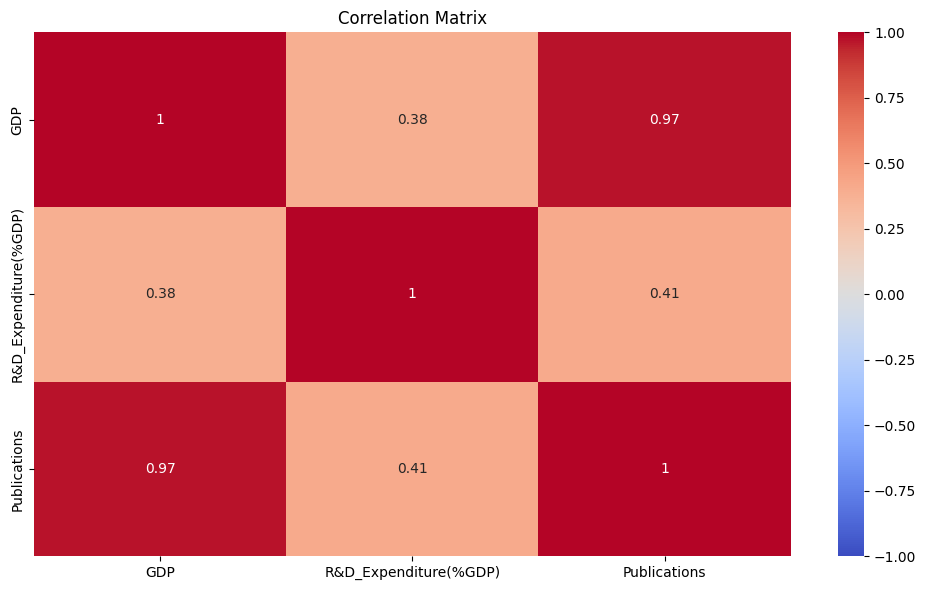

<ipython-input-47-3daed94a098a>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


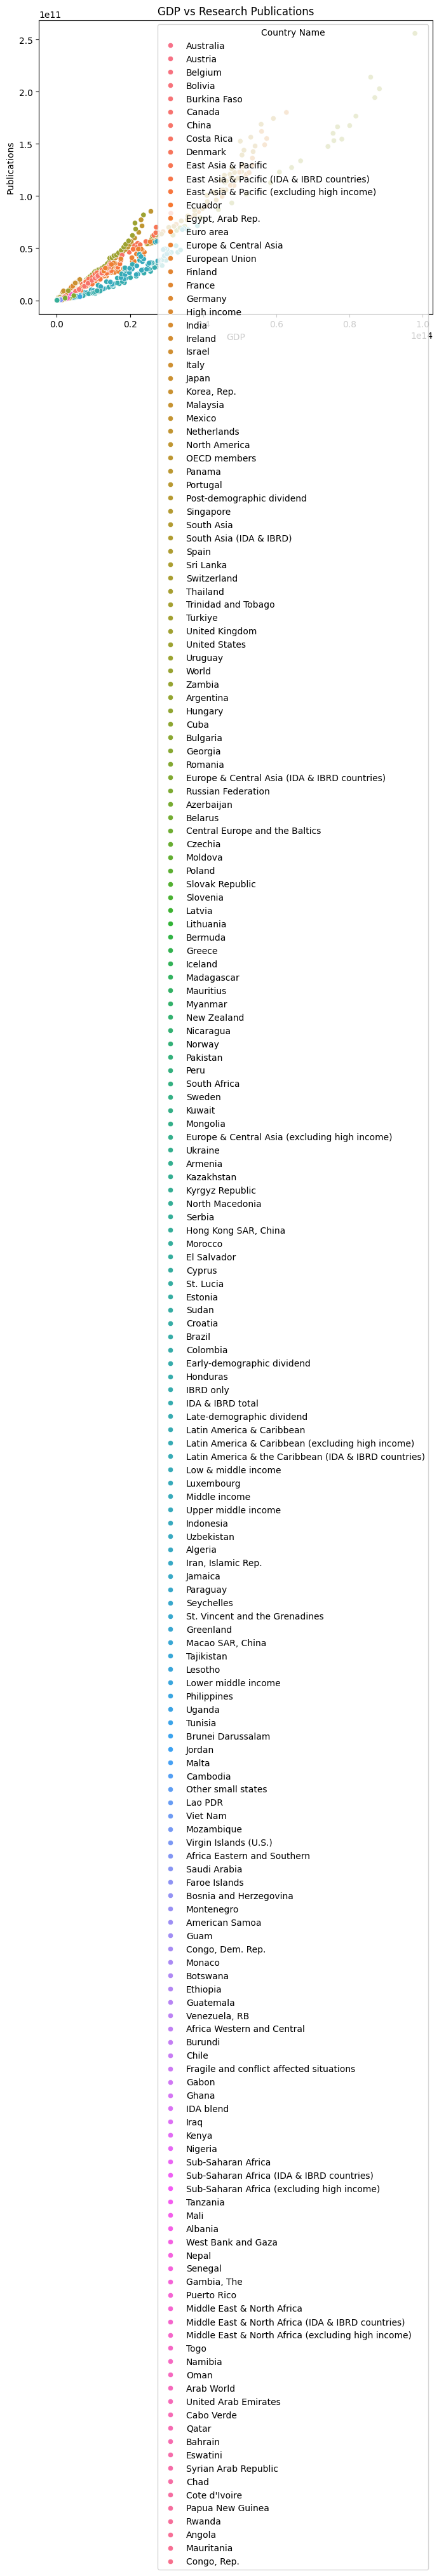

<ipython-input-47-3daed94a098a>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


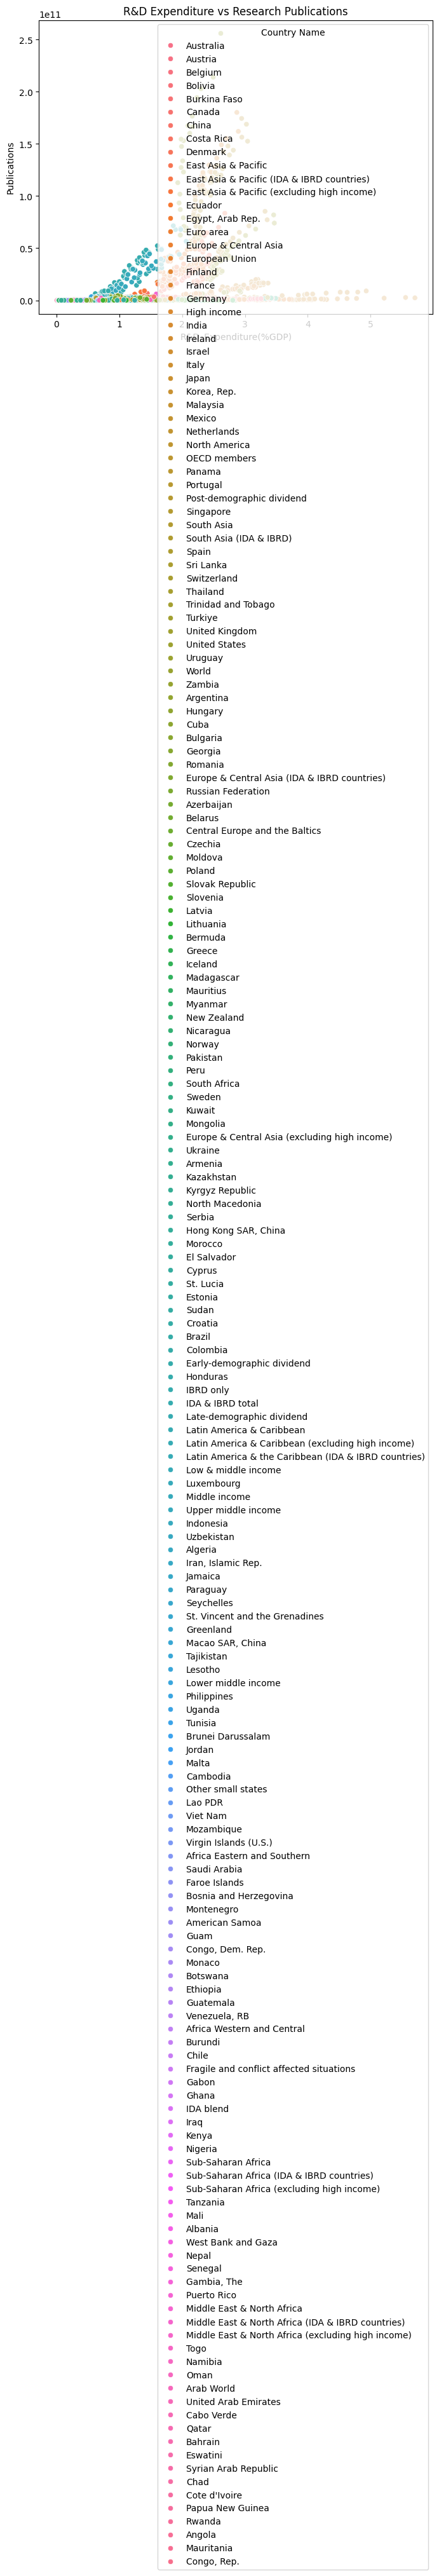

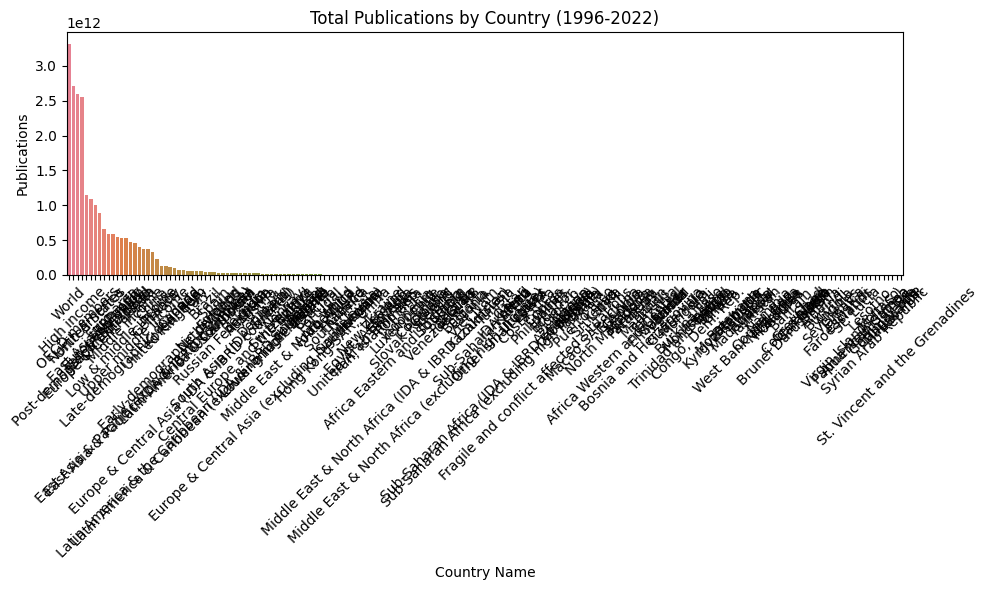

In [47]:
# 1. CORRELATION HEATMAP
plt.figure(figsize=(10, 6))
corr_matrix = df[['GDP', 'R&D_Expenditure(%GDP)', 'Publications']].corr(min_periods=1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 2. SCATTER PLOTS
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP', y='Publications', hue='Country Name')
plt.title("GDP vs Research Publications")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='R&D_Expenditure(%GDP)', y='Publications', hue='Country Name')
plt.title("R&D Expenditure vs Research Publications")
plt.tight_layout()
plt.show()

# 3. PUBLICATION RANKINGS
top_countries = df.groupby('Country Name')['Publications'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Country Name', y='Publications', hue='Country Name',
            dodge=False, legend=False)
plt.title("Total Publications by Country (1996-2022)")  # Fixed year range
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# ======================
# 📈 MODEL TRAINING & EVALUATION
# ======================

# 1. Define input features (X) and target variable (y)
X = df[['GDP', 'R&D_Expenditure(%GDP)']]  # Independent variables
y = df['Publications']                   # Target: estimated publication count

In [51]:


# 2. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:

# 3. Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# 4. Random Forest Regression Model (tuned hyperparameters)
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [53]:
# 5. Evaluation Metrics

# Compute R² (coefficient of determination) and RMSE (Root Mean Squared Error)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5  # √MSE

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5  # √MSE

In [54]:
# 6. Display Results
print("📊 Model Performance Summary:\n")

print("📉 Linear Regression:")
print(f"R² Score: {r2_lr:.3f} ({r2_lr*100:.1f}%)")
print(f"RMSE: {rmse_lr:,.2f}")

print("\n🌲 Random Forest Regression:")
print(f"R² Score: {r2_rf:.3f} ({r2_rf*100:.1f}%)")
print(f"RMSE: {rmse_rf:,.2f}")

📊 Model Performance Summary:

📉 Linear Regression:
R² Score: 0.933 (93.3%)
RMSE: 4,963,108,646.19

🌲 Random Forest Regression:
R² Score: 0.995 (99.5%)
RMSE: 1,415,990,462.41


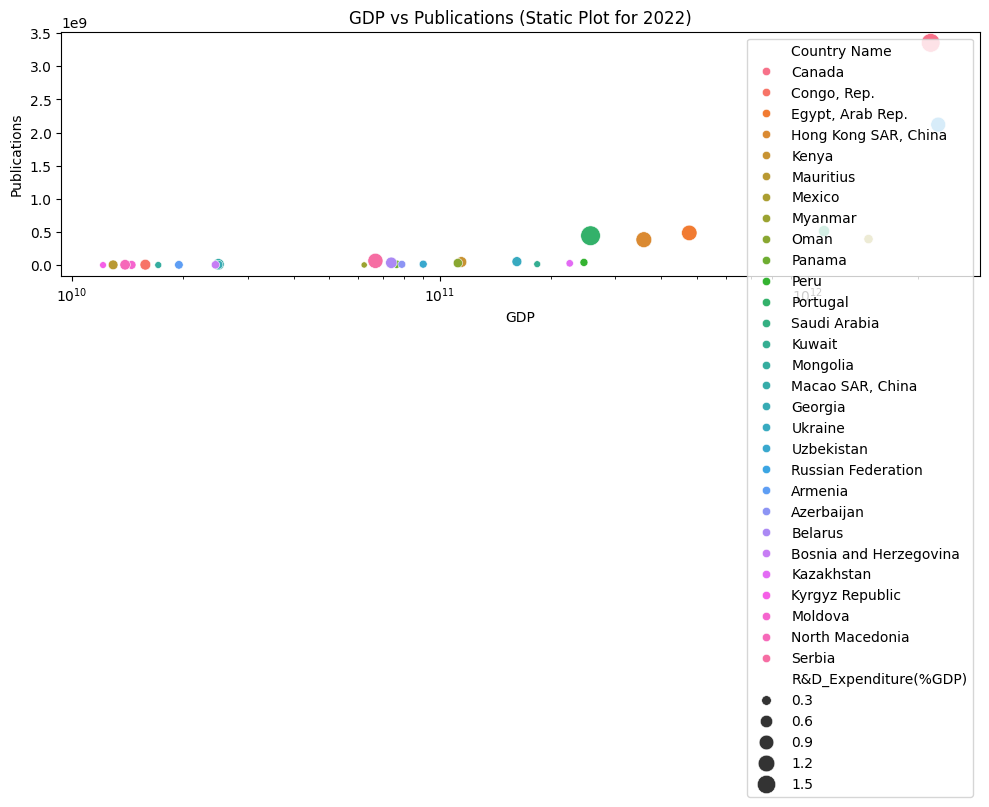

In [49]:

# Make a static version for the most recent year
latest_year = df['Year'].max()  # Find the most recent year in the dataset
df_latest = df[df['Year'] == latest_year]  # Filter data for just that year

# Create a static scatter plot for the latest year
plt.figure(figsize=(10, 6))
# Use size of points to represent R&D expenditure
sns.scatterplot(data=df_latest, x='GDP', y='Publications', hue='Country Name', size='R&D_Expenditure(%GDP)', sizes=(20, 200))
plt.xscale('log')  # Log scale for GDP since values vary widely
plt.title(f"GDP vs Publications (Static Plot for {latest_year})")
plt.tight_layout()
plt.show()


# the dataset is so large that plotting is seen to be very cluttered, but have no options else this , tried alot of methods for filtering and sorting but at the end of day nothing worked due to the dataset.



## ✅ Final Summary and Insights

* The project explores the correlation between GDP, R&D expenditure, and scientific research output.
* Due to unavailability of free structured publication data, publication counts were estimated using a GDP × R&D% based formula.
* Strong correlation observed:
  * GDP vs Publications: Positive correlation
  * R&D% vs Publications: Moderate correlation
* Linear Regression:
  * R² ≈ 0.933 → Accuracy: 93.3%
* Random Forest (Tuned):
  * R² ≈ 0.995 → Accuracy: 99.5%
* Random Forest performed significantly better.
* A static snapshot is shown due to Plotly limitations in PDF.
* All required components (EDA, modeling, dashboard, insights) have been implemented and explained with comments.
